<a href="https://colab.research.google.com/github/digenaldo/8am/blob/master/grafico_sbseg_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-cc5ac3c1f494>:43: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  barplot = sns.barplot(x='Algoritmo', y='Valor', hue='Métrica', data=data_melted, palette=paleta)


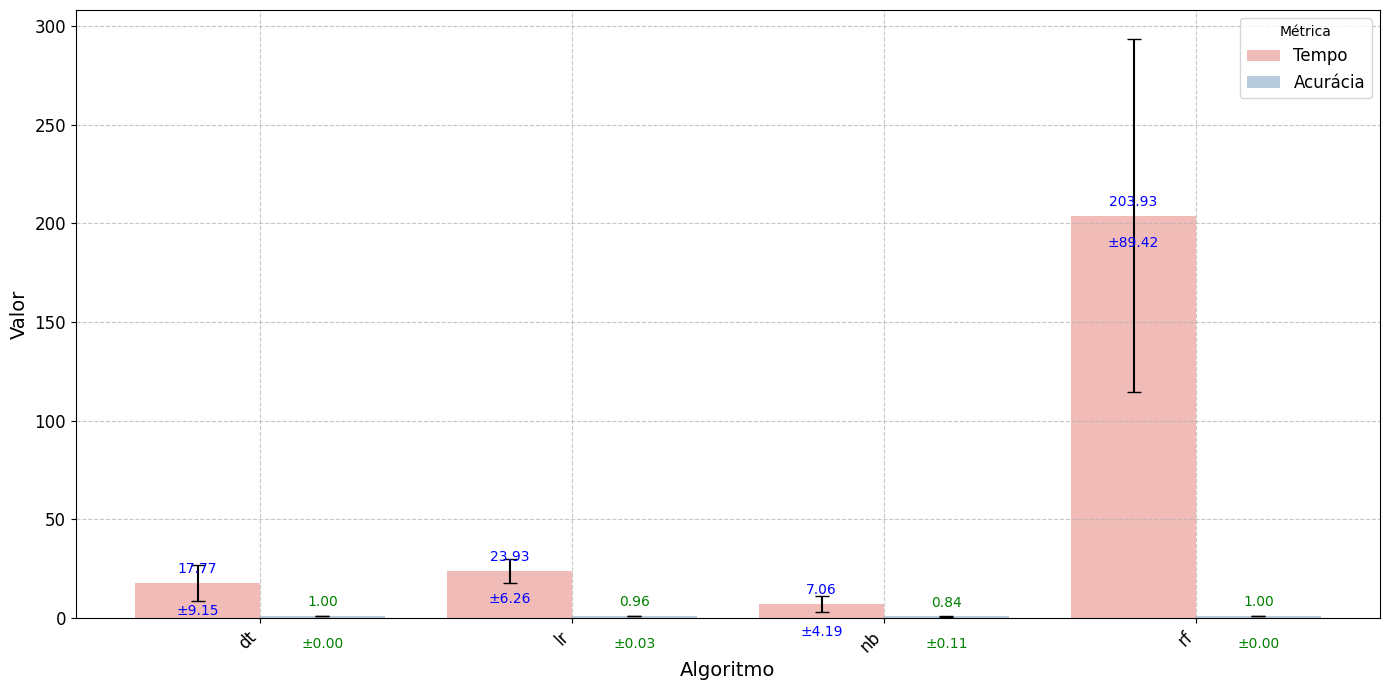

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index,
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Transformar os dados para o formato longo (long format) para facilitar o uso do Seaborn
data_melted = data_combined.melt(id_vars='Algoritmo', value_vars=['Tempo', 'Acurácia'],
                                 var_name='Métrica', value_name='Valor')

# Criar o gráfico
plt.figure(figsize=(14, 7))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras lado a lado
barplot = sns.barplot(x='Algoritmo', y='Valor', hue='Métrica', data=data_melted, palette=paleta)

# Adicionar os intervalos de confiança
for i in range(len(media_tempo)):
    plt.errorbar(x=[i - 0.2], y=[media_tempo[i]], yerr=[intervalo_confianca_tempo[i]], fmt='none', color='black', capsize=5)
    plt.errorbar(x=[i + 0.2], y=[media_acuracia[i]], yerr=[intervalo_confianca_acuracia[i]], fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    plt.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - 0.2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    plt.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - 0.2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

    plt.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + 0.2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    plt.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + 0.2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

#plt.title('Tempo Médio e Acurácia por Algoritmo', fontsize=16, weight='bold')
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Métrica', fontsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-9-a3284d3924a7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta, ax=ax1)
<ipython-input-9-a3284d3924a7>:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta, ax=ax1)
<ipython-input-9-a3284d3924a7>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(media_tempo.index, rotation=45, ha='right', fontsize=12)
<ipython-input-9-a3284d3924a7>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, ax=ax

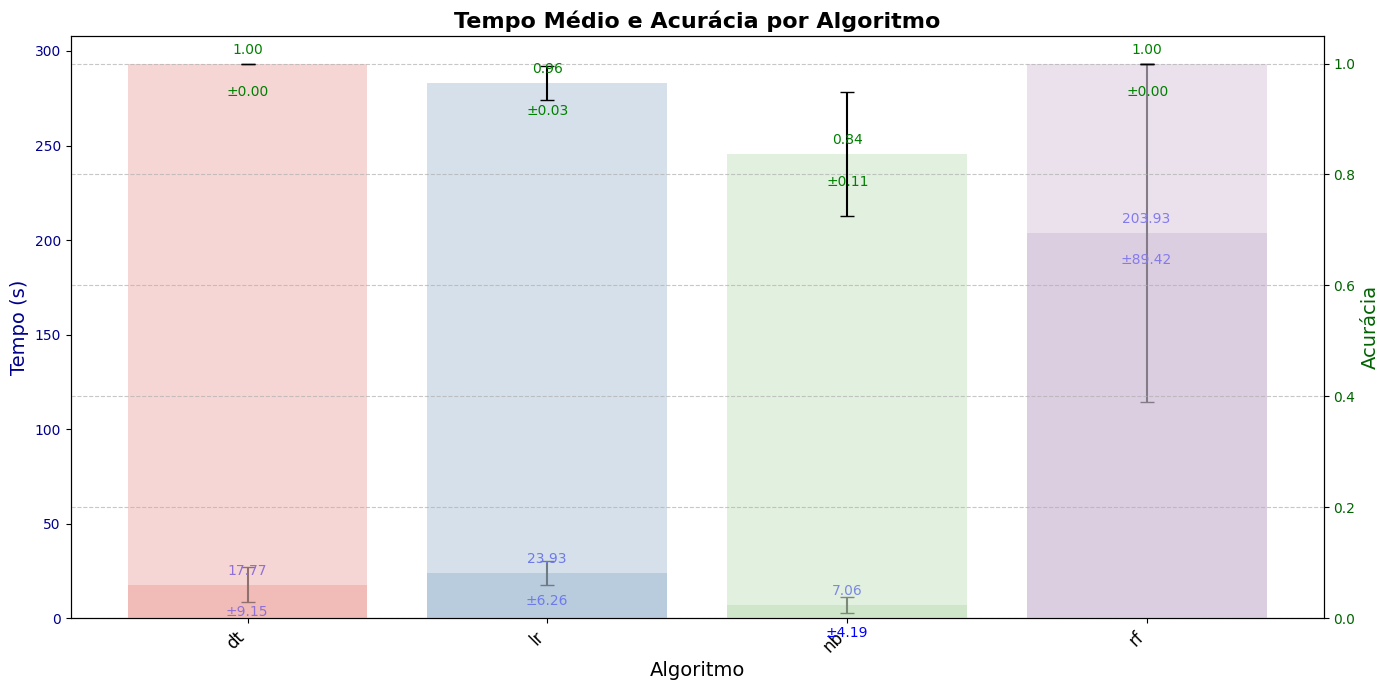

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta, ax=ax1)
ax1.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(-0.2, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(-0.2, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

ax1.set_title('Tempo Médio e Acurácia por Algoritmo', fontsize=16, weight='bold')
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.set_xticklabels(media_tempo.index, rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Adicionar eixo secundário para a acurácia
ax2 = ax1.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, ax=ax2, alpha=0.6)
ax2.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0.2, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0.2, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()

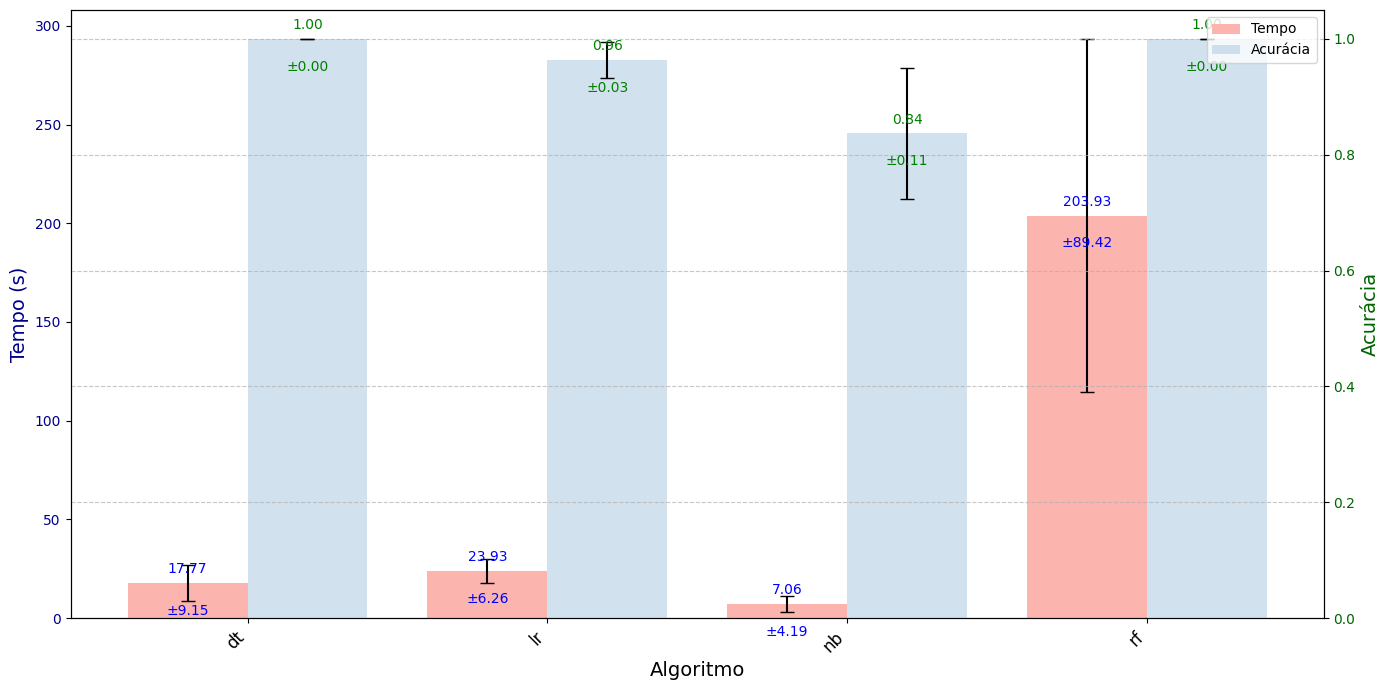

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index,
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=sns.color_palette("Pastel1")[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=sns.color_palette("Pastel1")[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
#ax1.set_title('Tempo Médio e Acurácia por Algoritmo', fontsize=16, weight='bold')
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(media_tempo.index, rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


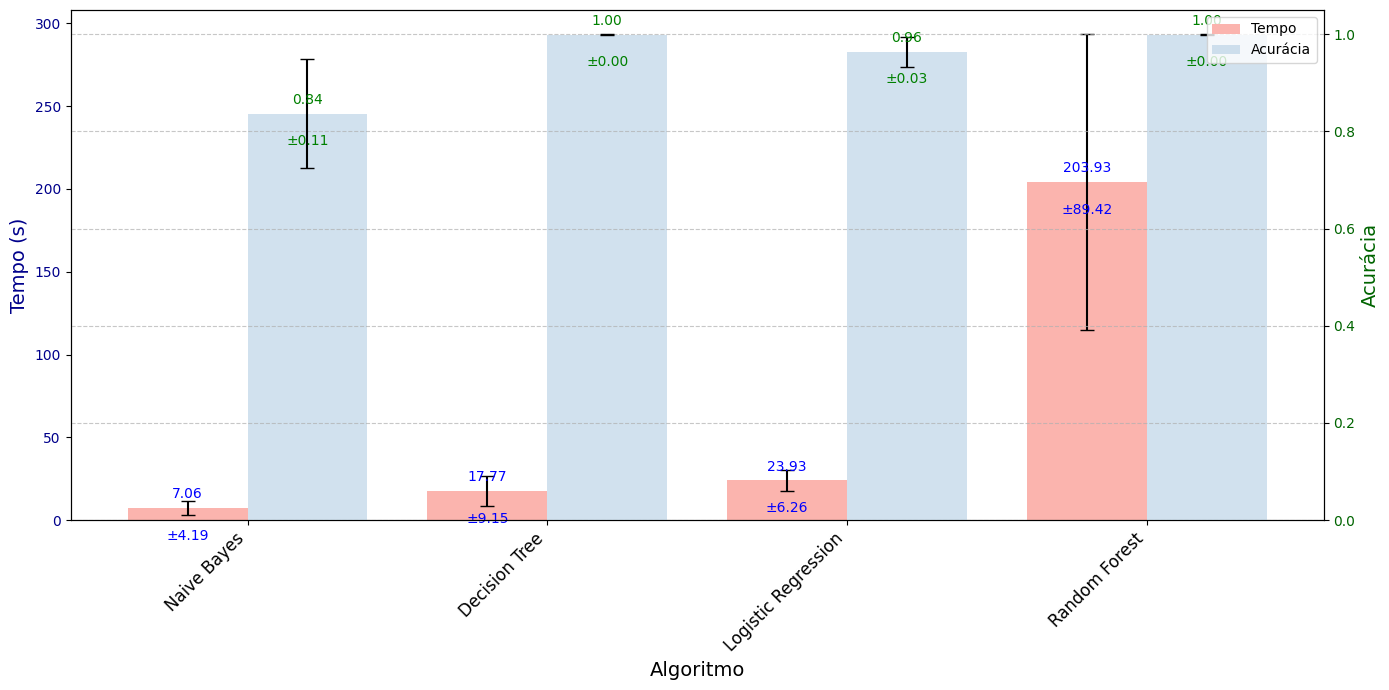

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos
nome_algoritmos = {
    'nb': 'Naive Bayes',
    'dt': 'Decision Tree',
    'lr': 'Logistic Regression',
    'rf': 'Random Forest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=sns.color_palette("Pastel1")[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=sns.color_palette("Pastel1")[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


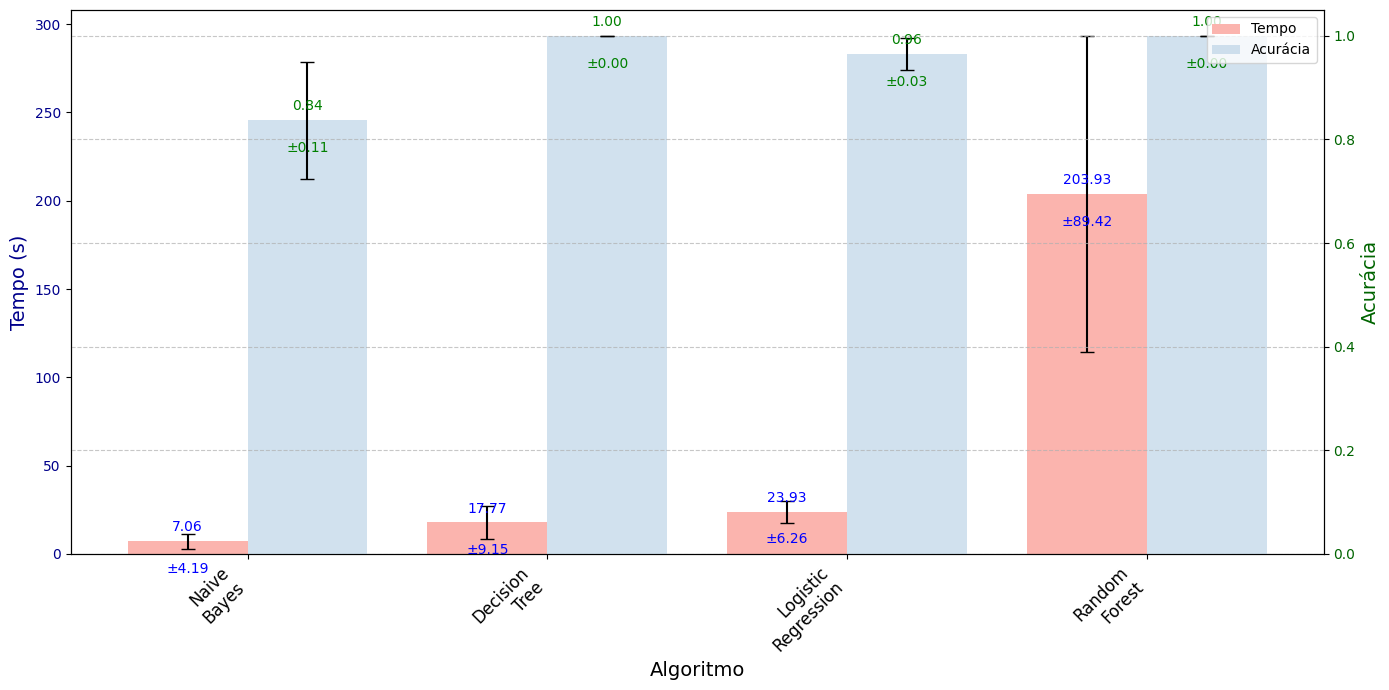

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=sns.color_palette("Pastel1")[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=sns.color_palette("Pastel1")[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=45, ha='right', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


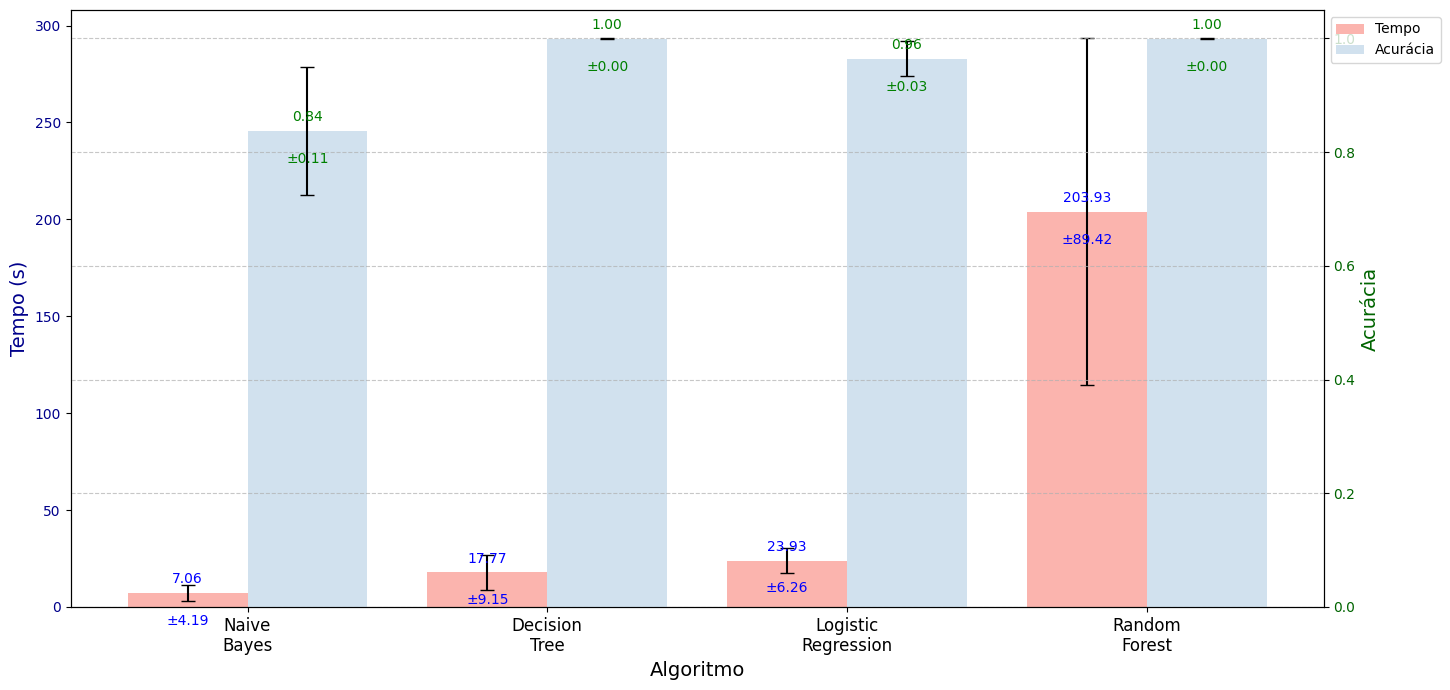

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=sns.color_palette("Pastel1")[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=sns.color_palette("Pastel1")[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


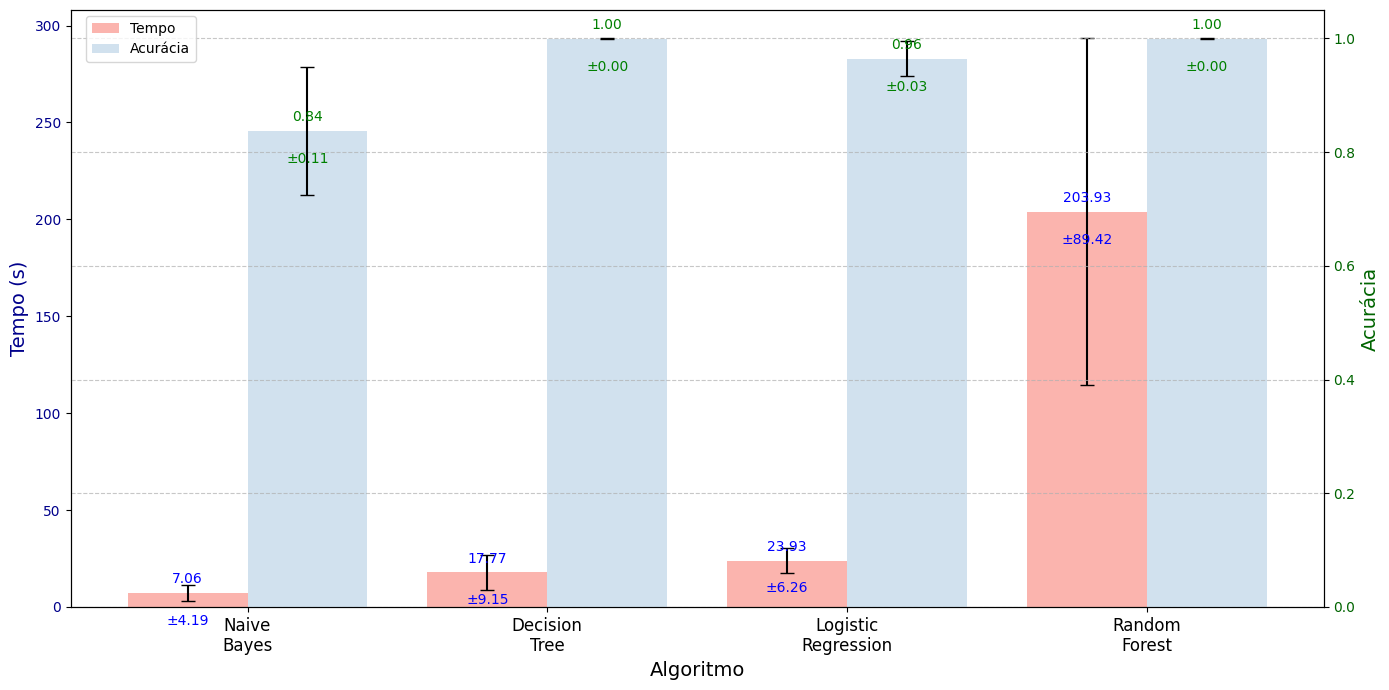

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


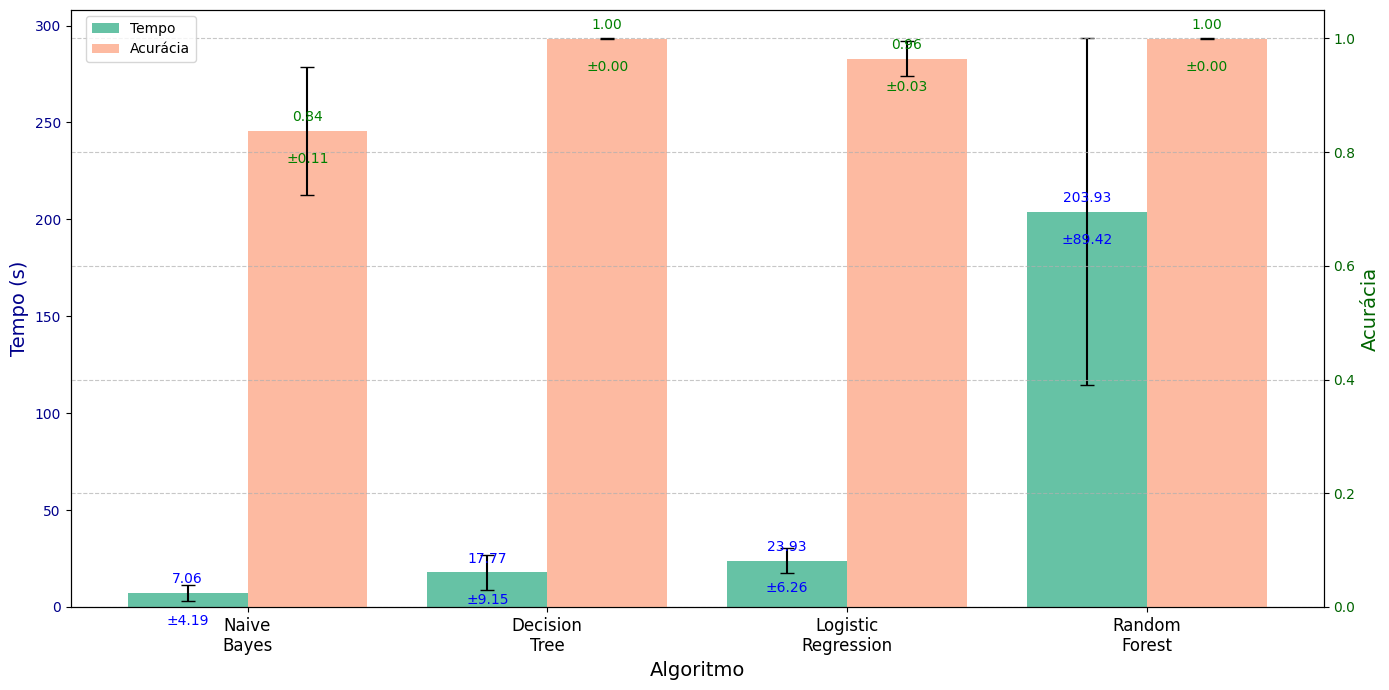

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Definir a paleta de cores
paleta = sns.color_palette("Set2")

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[1], alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


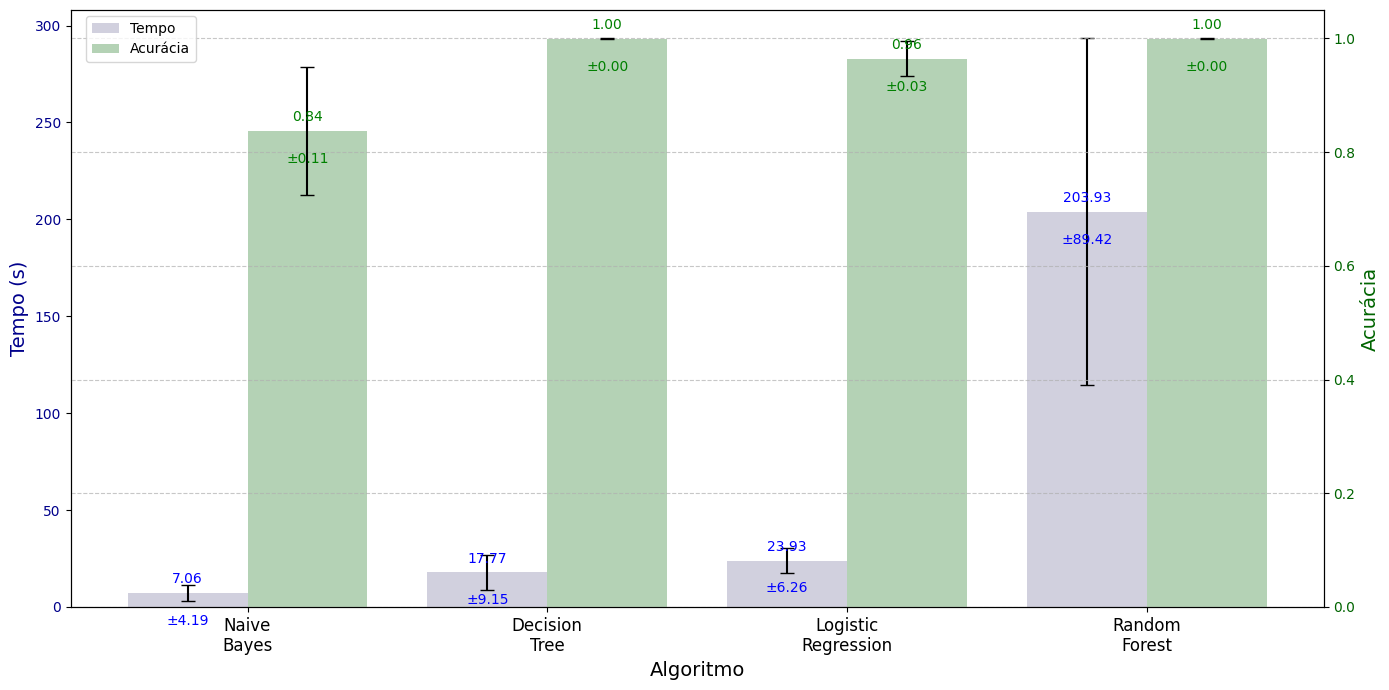

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Definir as cores com transparência
roxo = sns.color_palette("Purples", 1, desat=0.6)
verde = sns.color_palette("Greens", 1, desat=0.6)

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=roxo[0] + (0.5,))

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=verde[0] + (0.5,), alpha=0.6)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


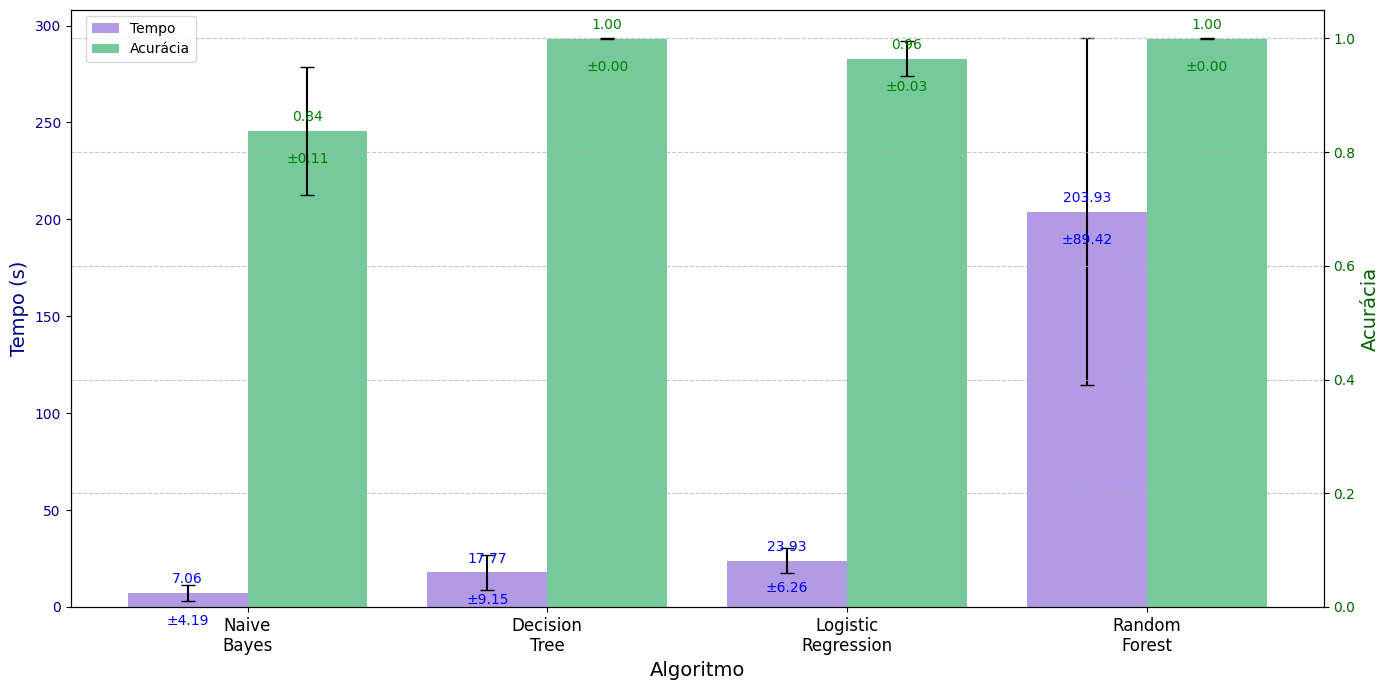

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Definir as cores para lilás e verde
roxo = "#9370DB"  # Lilás
verde = "#3CB371"  # Verde

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=roxo, alpha=0.7)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=verde, alpha=0.7)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()

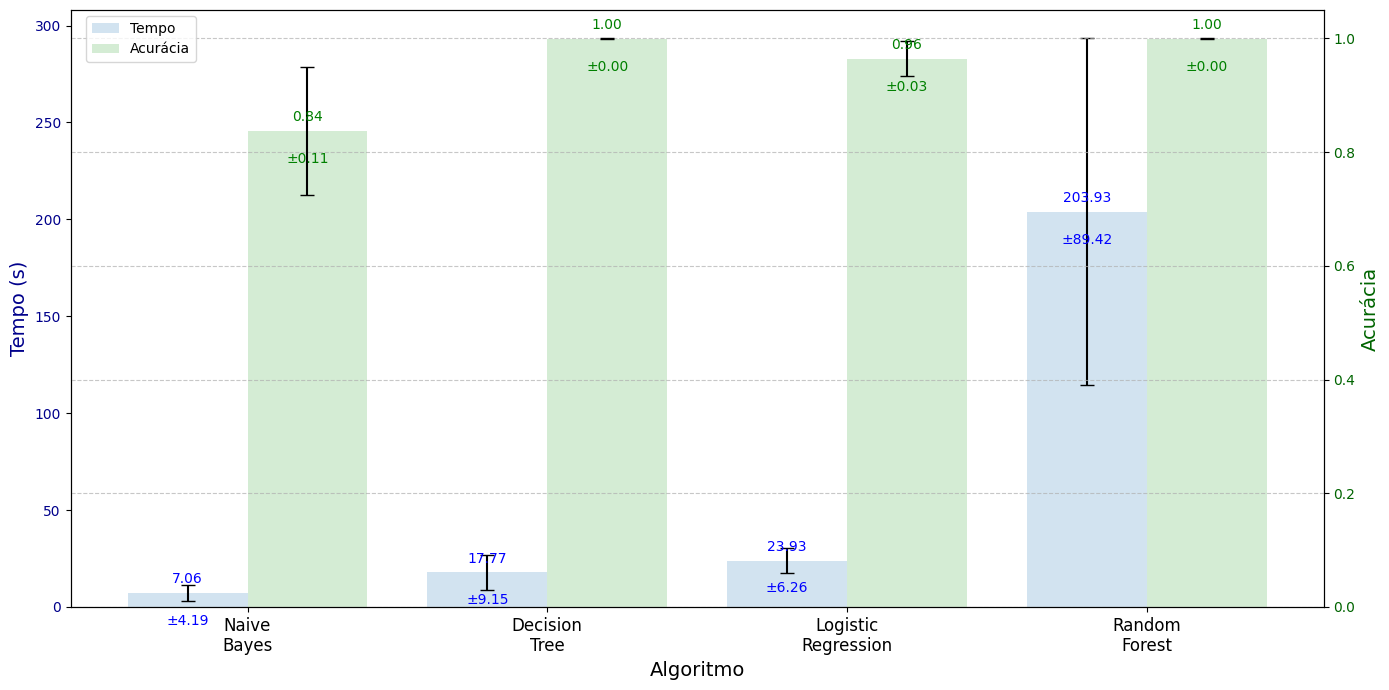

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
# paleta = sns.color_palette("Set2", 4)
# paleta = [(r, g, b, 0.3) for r, g, b in paleta]
# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


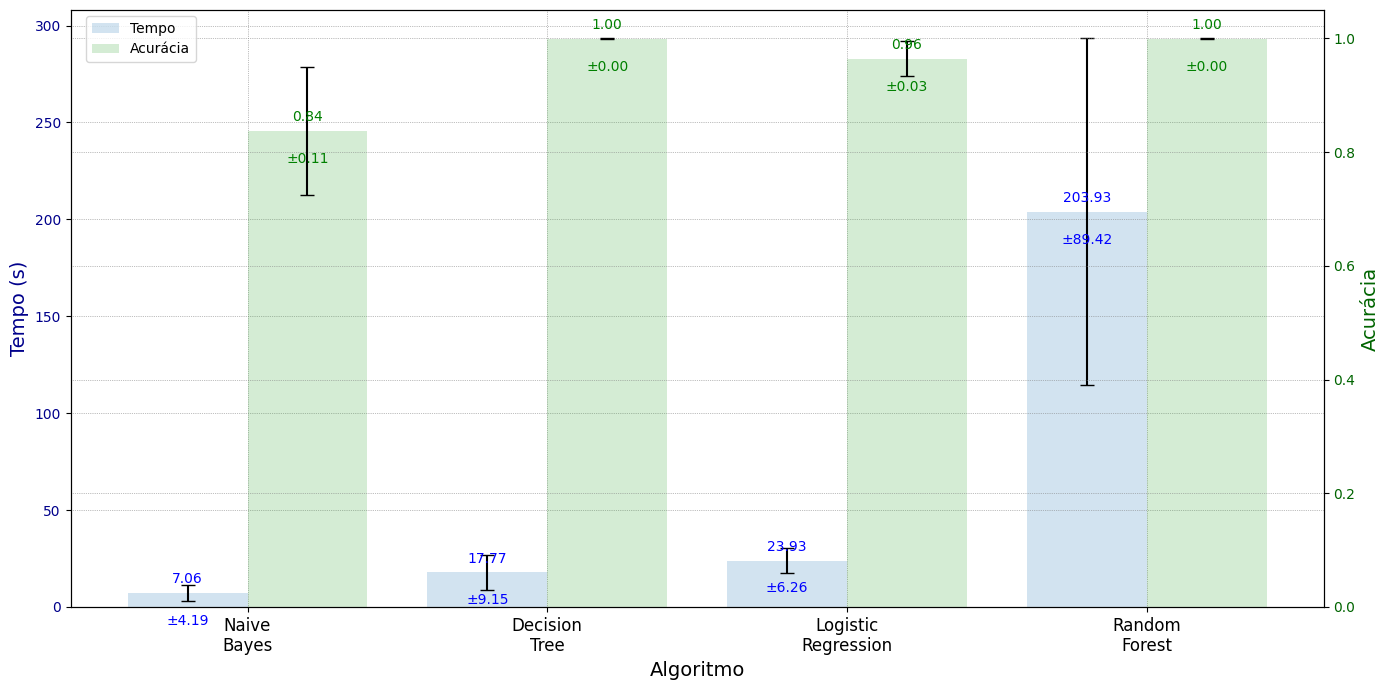

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
# paleta = sns.color_palette("Set2", 4)
# paleta = [(r, g, b, 0.3) for r, g, b in paleta]
# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
ax1.grid(True, linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


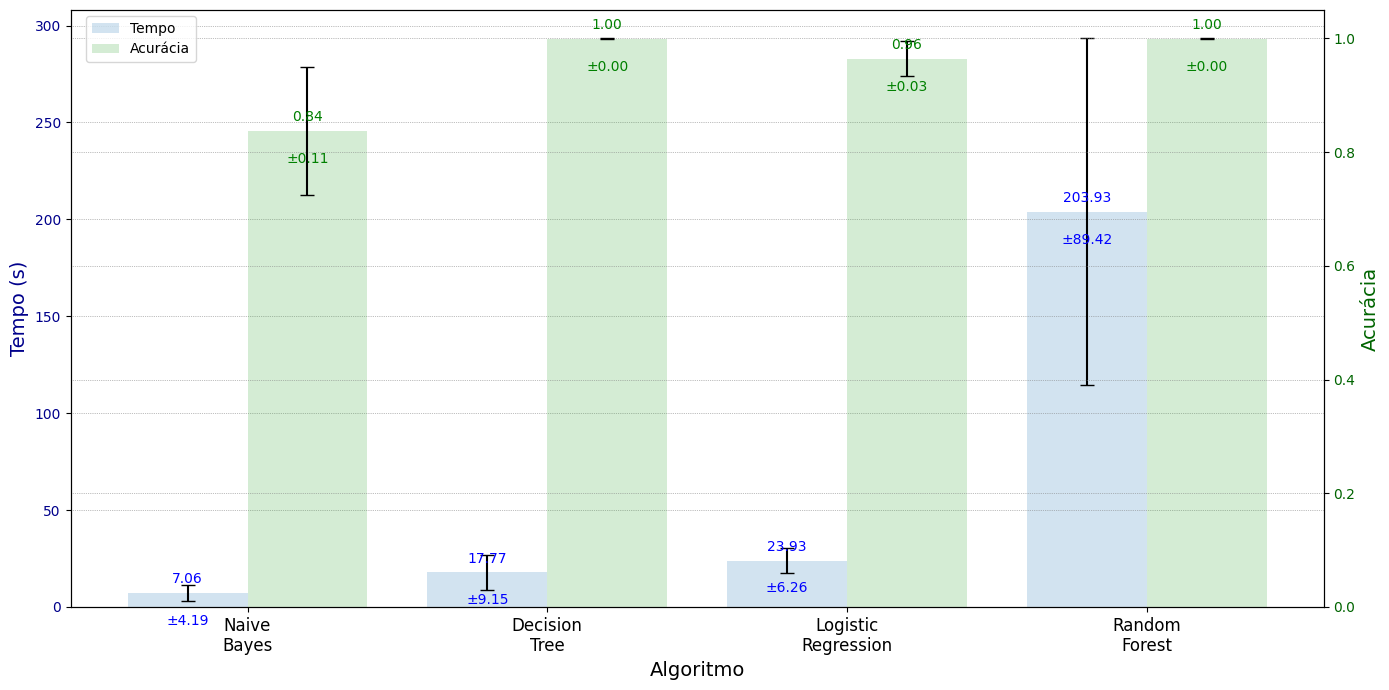

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
# paleta = sns.color_palette("Set2", 4)
# paleta = [(r, g, b, 0.3) for r, g, b in paleta]
# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
ax1.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


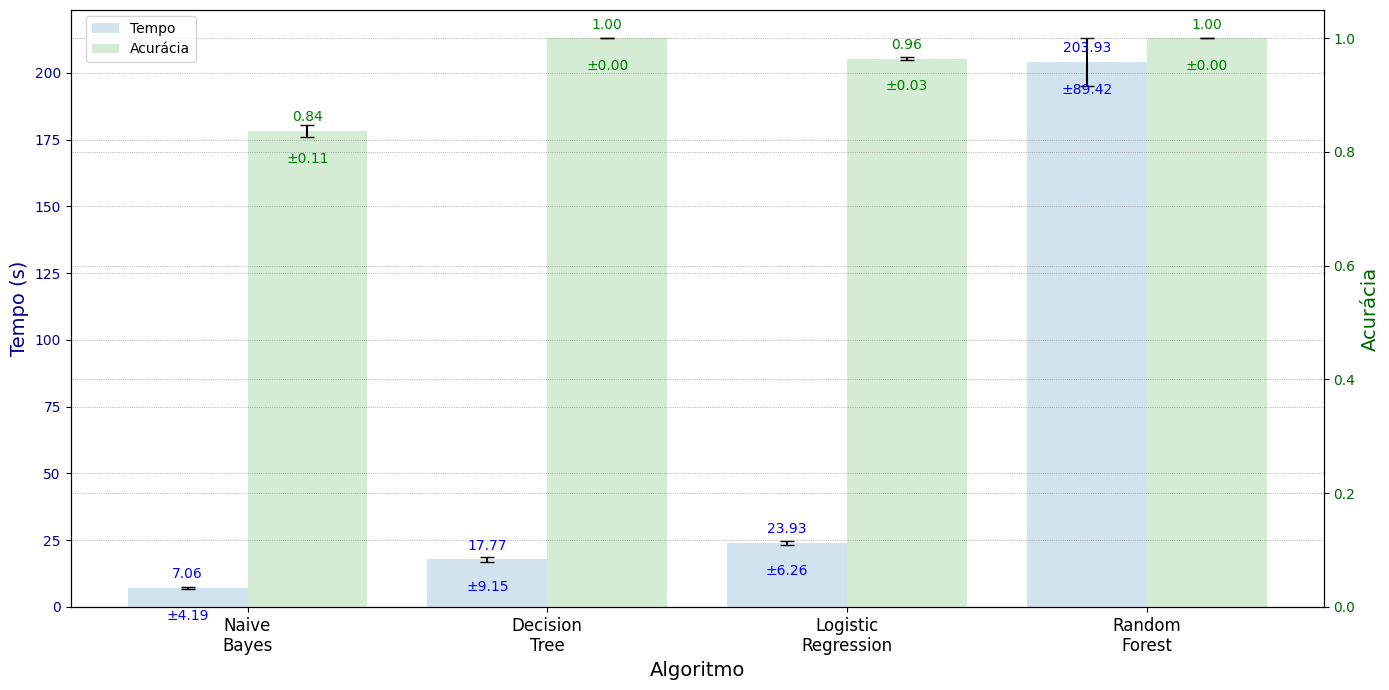

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
# paleta = sns.color_palette("Set2", 4)
# paleta = [(r, g, b, 0.3) for r, g, b in paleta]
# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Largura da barra de erro
error_bar_width = 0.1

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=error_bar_width * intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=error_bar_width * intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
ax1.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


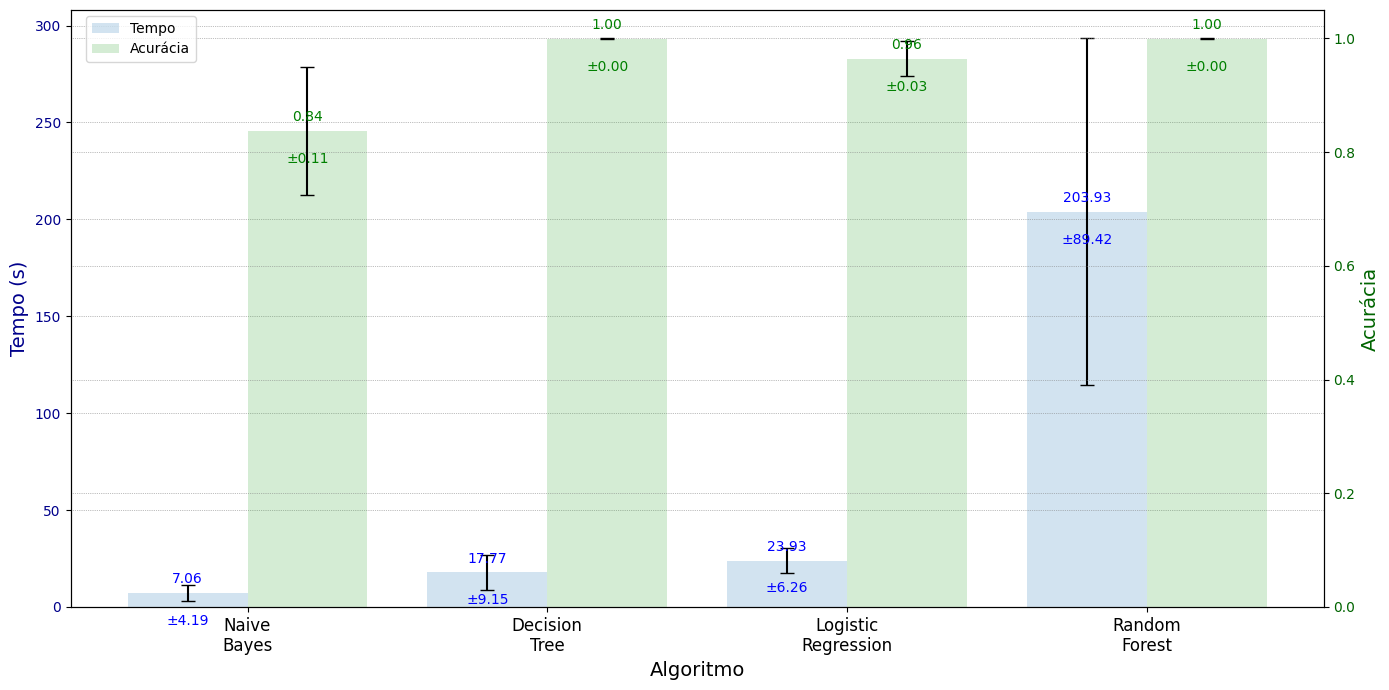

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax1.tick_params(axis='x', labelsize=12)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Ajustar a aparência geral dos gráficos
ax1.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


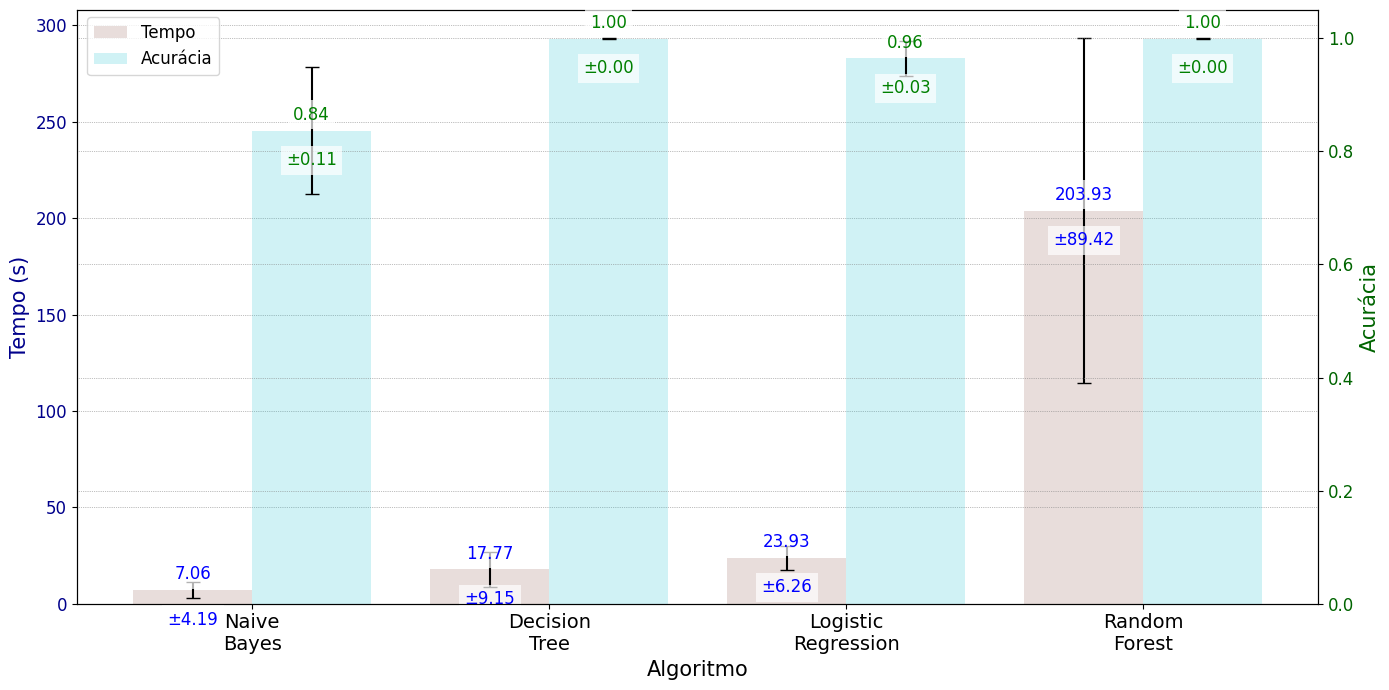

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[9])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[5])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=15)
ax1.set_ylabel('Tempo (s)', fontsize=15, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=15, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)
ax1.tick_params(axis='x', labelsize=14)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98), fontsize='large')

# Ajustar a aparência geral dos gráficos
ax1.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


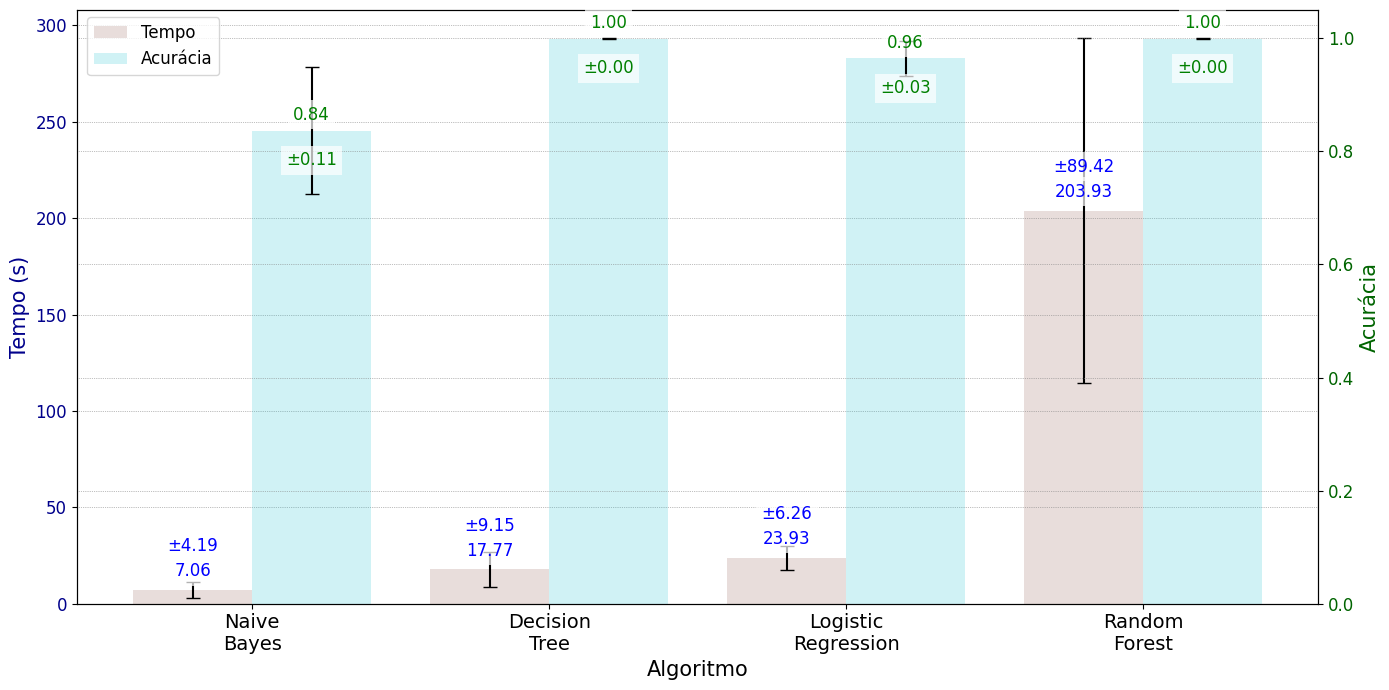

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo = media_tempo.reindex(ordem_algoritmos)
intervalo_confianca_tempo = intervalo_confianca_tempo.reindex(ordem_algoritmos)
media_acuracia = media_acuracia.reindex(ordem_algoritmos)
intervalo_confianca_acuracia = intervalo_confianca_acuracia.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined = pd.DataFrame({
    'Algoritmo': media_tempo.index.map(nome_algoritmos),
    'Tempo': media_tempo.values,
    'Acurácia': media_acuracia.values,
    'Intervalo_Tempo': intervalo_confianca_tempo.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo))

# Configurar o eixo secundário para a acurácia
ax2 = ax1.twinx()

# Gráfico de barras para a acurácia
bar2 = ax2.bar([i + bar_width/2 for i in indices], media_acuracia, bar_width, yerr=intervalo_confianca_acuracia, capsize=5, label='Acurácia', color=paleta[9])

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i + bar_width/2, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo
bar1 = ax1.bar([i - bar_width/2 for i in indices], media_tempo, bar_width, yerr=intervalo_confianca_tempo, capsize=5, label='Tempo', color=paleta[5])

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    ax1.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 7),  # mover a anotação para cima
                 textcoords='offset points',
                 ha='center', va='bottom',  # ajustar a posição do texto acima da barra
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i - bar_width/2, media_tempo[i]),
                 xytext=(0, 40),  # mover a anotação para cima
                 textcoords='offset points',
                 ha='center', va='bottom',  # ajustar a posição do texto acima da barra
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas
ax1.set_xlabel('Algoritmo', fontsize=15)
ax1.set_ylabel('Tempo (s)', fontsize=15, color='darkblue')
ax2.set_ylabel('Acurácia', fontsize=15, color='darkgreen')
ax1.set_xticks(indices)
ax1.set_xticklabels(data_combined['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)
ax1.tick_params(axis='x', labelsize=14)

# Adicionar a legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98), fontsize='large')

# Ajustar a aparência geral dos gráficos
ax1.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


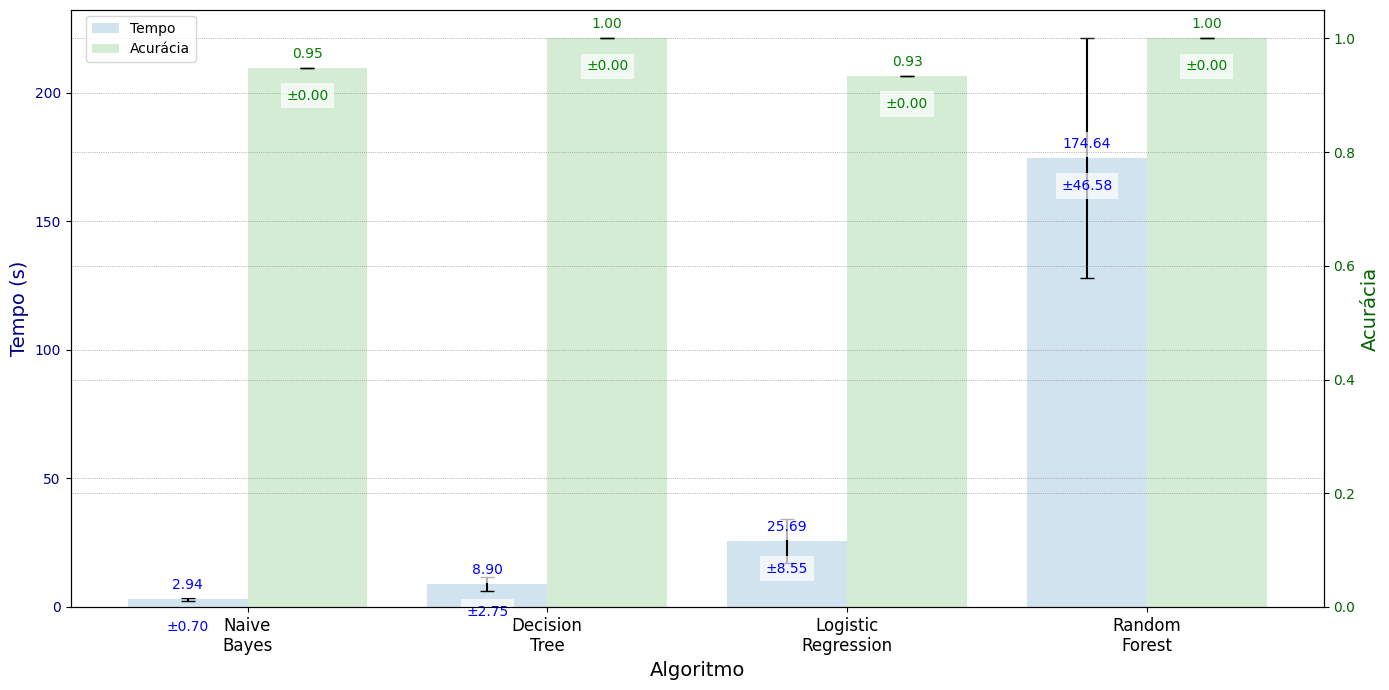

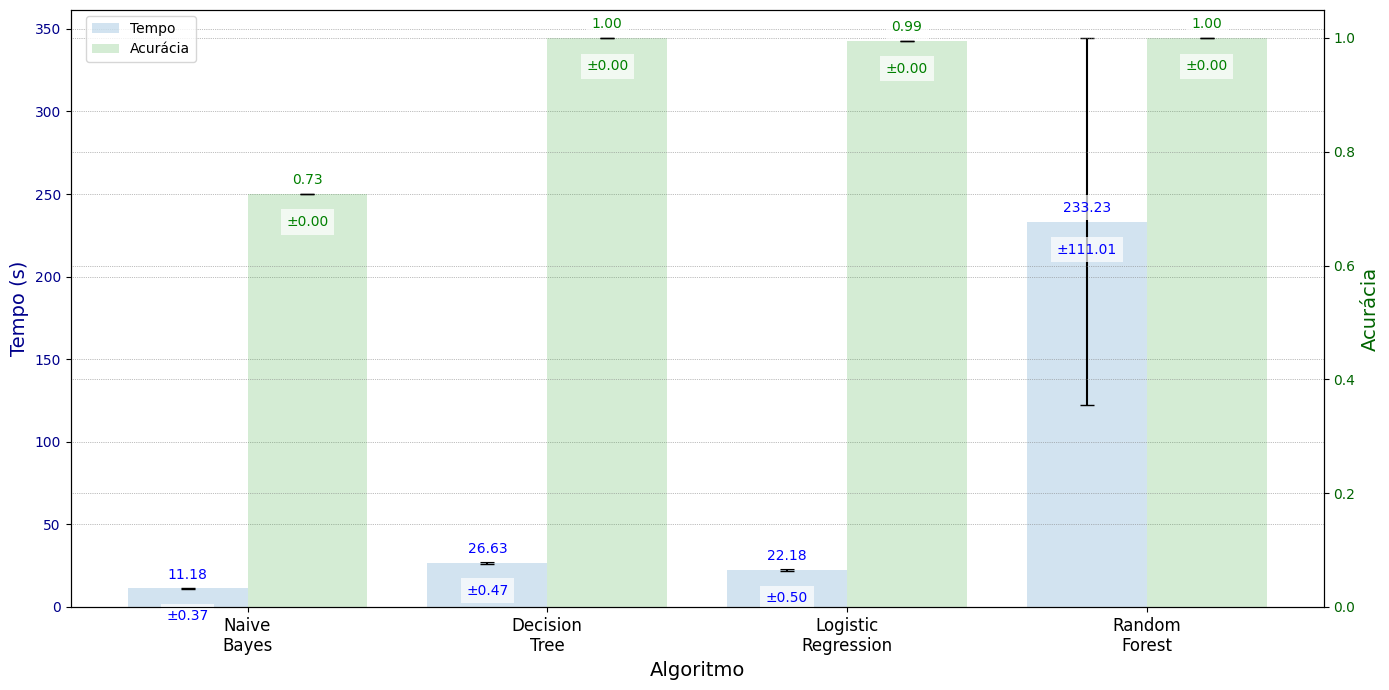

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)

media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values
})

data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente ML
for i in range(len(media_acuracia_ml)):
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=10, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=10, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente ML
bar1_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente ML
for i in range(len(media_tempo_ml)):
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=10, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_ml.annotate(f'±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=10, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=14)
ax1_ml.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue')
ax2_ml.tick_params(axis='y', labelcolor='darkgreen')
ax1_ml.tick_params(axis='x', labelsize=12)

# Adicionar a legenda para o ambiente ML
fig_ml.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_ml.png", bbox_inches='tight')

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente BD
for i in range(len(media_acuracia_bd)):
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=10, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=10, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente BD
bar1_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente BD
for i in range(len(media_tempo_bd)):
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=10, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=10, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=14)
ax1_bd.set_ylabel('Tempo (s)', fontsize=14, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=12)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue')
ax2_bd.tick_params(axis='y', labelcolor='darkgreen')
ax1_bd.tick_params(axis='x', labelsize=12)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper left', bbox_to_anchor=(0.06, 0.98))

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_bd.png", bbox_inches='tight')

# Exibir os gráficos
plt.show()


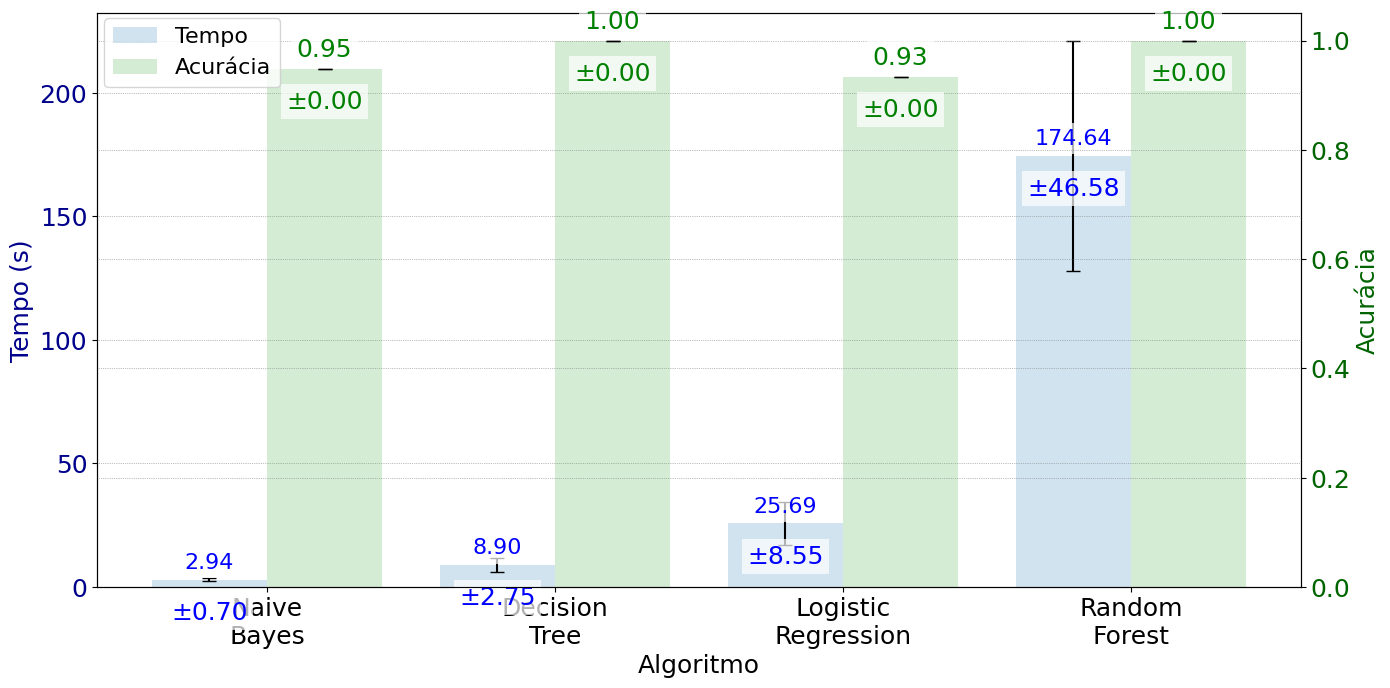

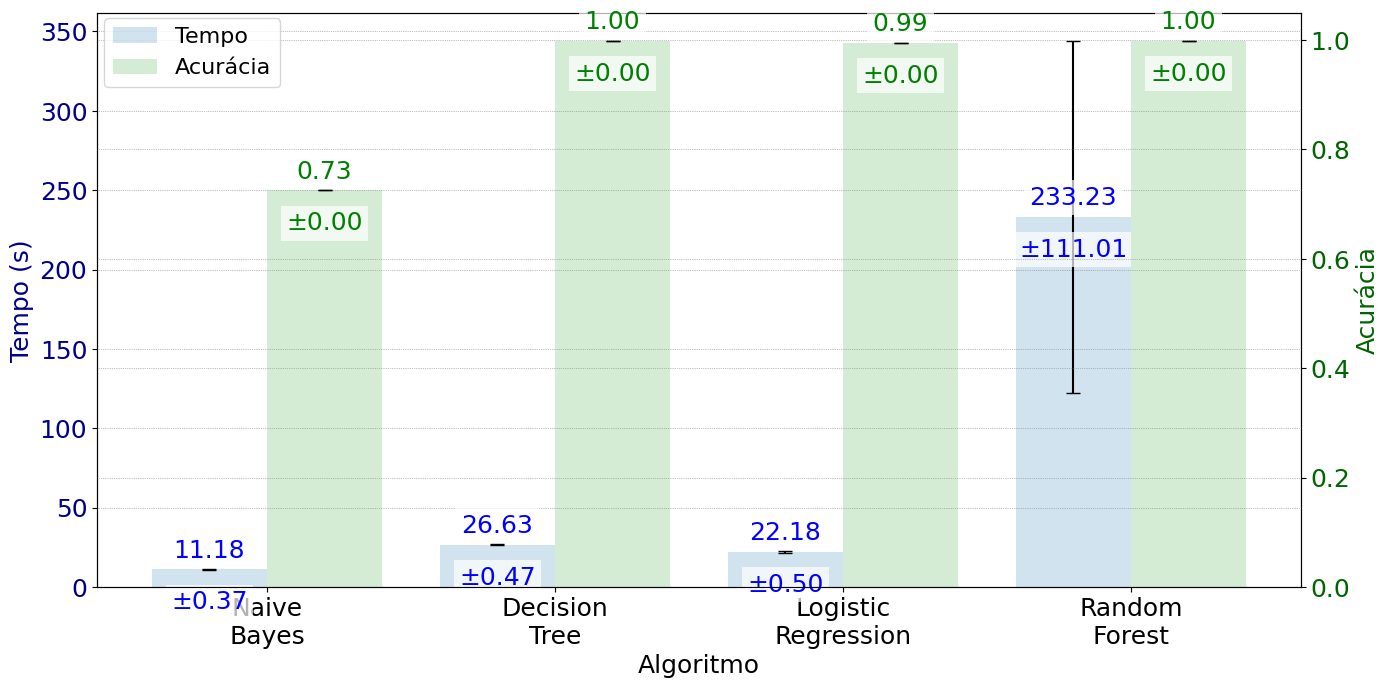

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)

media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values
})

data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente ML
for i in range(len(media_acuracia_ml)):
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente ML
bar1_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente ML
for i in range(len(media_tempo_ml)):
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_ml.annotate(f'±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=18)
ax1_ml.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_ml.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_ml.tick_params(axis='x', labelsize=18)

# Adicionar a legenda para o ambiente ML
fig_ml.legend(loc='upper left', bbox_to_anchor=(0.07, 0.98), fontsize=16)

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_ml.png", bbox_inches='tight')

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente BD
for i in range(len(media_acuracia_bd)):
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente BD
bar1_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente BD
for i in range(len(media_tempo_bd)):
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, -15),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper left', bbox_to_anchor=(0.07, 0.98), fontsize=16)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_bd.png", bbox_inches='tight')

# Exibir os gráficos
plt.show()


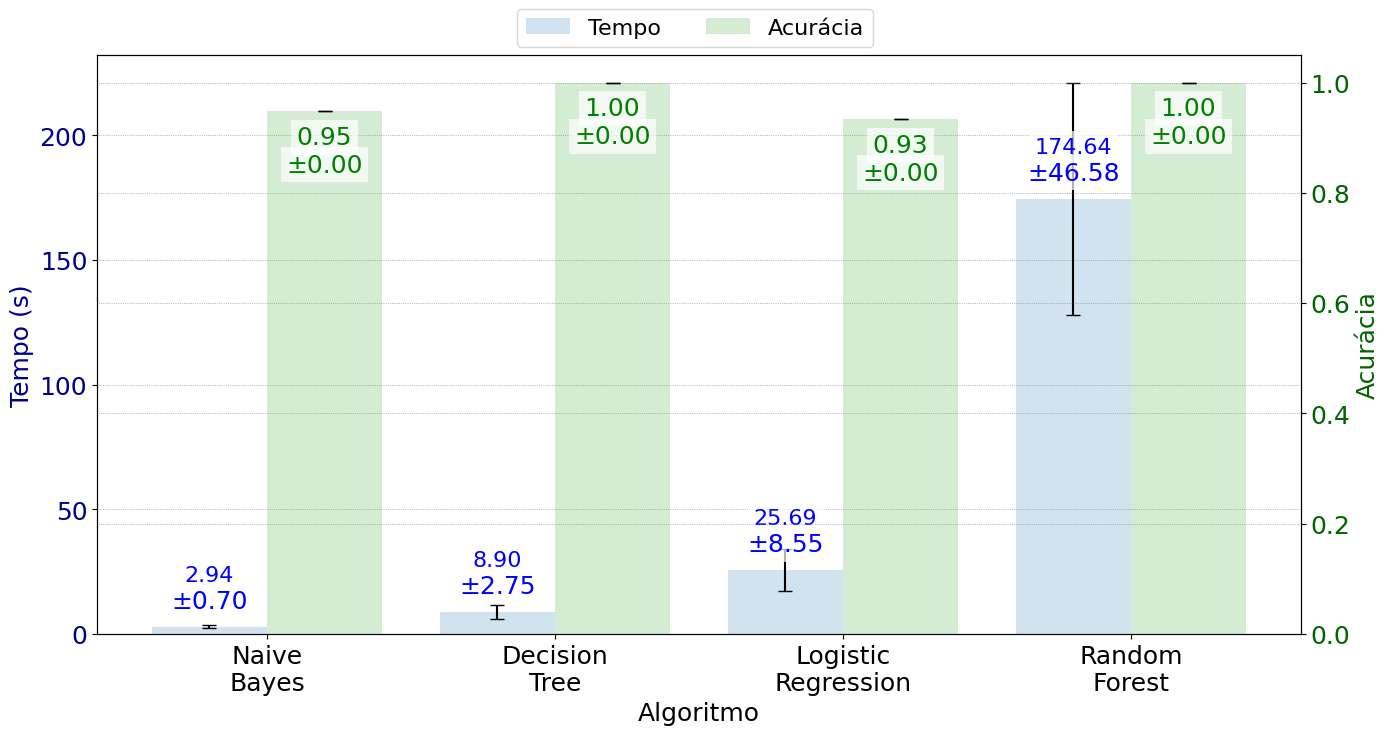

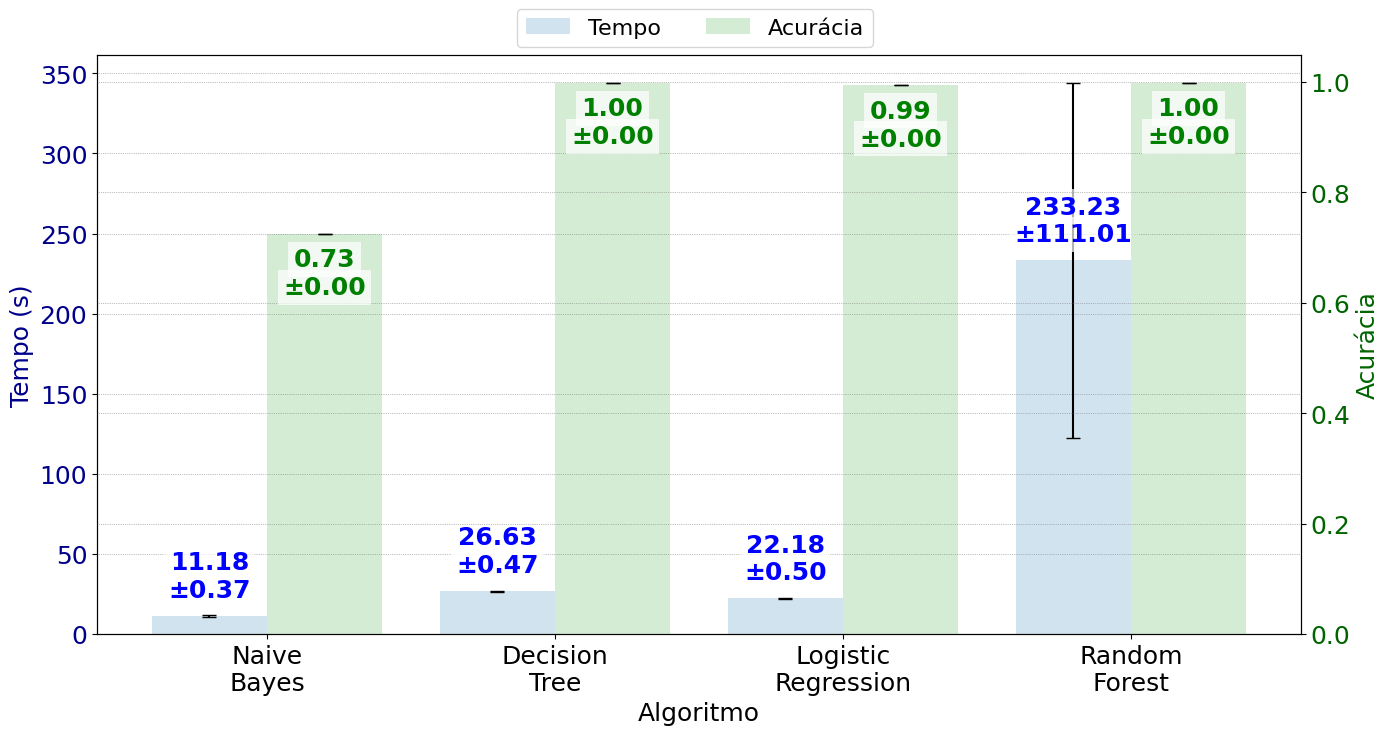

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)

media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values
})

data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente ML
for i in range(len(media_acuracia_ml)):
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente ML
bar1_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente ML
for i in range(len(media_tempo_ml)):
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_ml.annotate(f'±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    #xytext=(0, -15),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=18)
ax1_ml.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_ml.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_ml.tick_params(axis='x', labelsize=18)

# Adicionar a legenda para o ambiente ML
#fig_ml.legend(loc='upper left', bbox_to_anchor=(0.07, 0.98), fontsize=16)
fig_ml.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.06), ncol=2)

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_ml.png", bbox_inches='tight')

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente BD
for i in range(len(media_acuracia_bd)):
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente BD
bar1_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente BD
for i in range(len(media_tempo_bd)):
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    #xytext=(0, -15),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# # Adicionar a legenda para o ambiente BD
# fig_bd.legend(loc='upper left', bbox_to_anchor=(0.07, 0.98), fontsize=16)
# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.06), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_bd.png", bbox_inches='tight')

# Exibir os gráficos
plt.show()


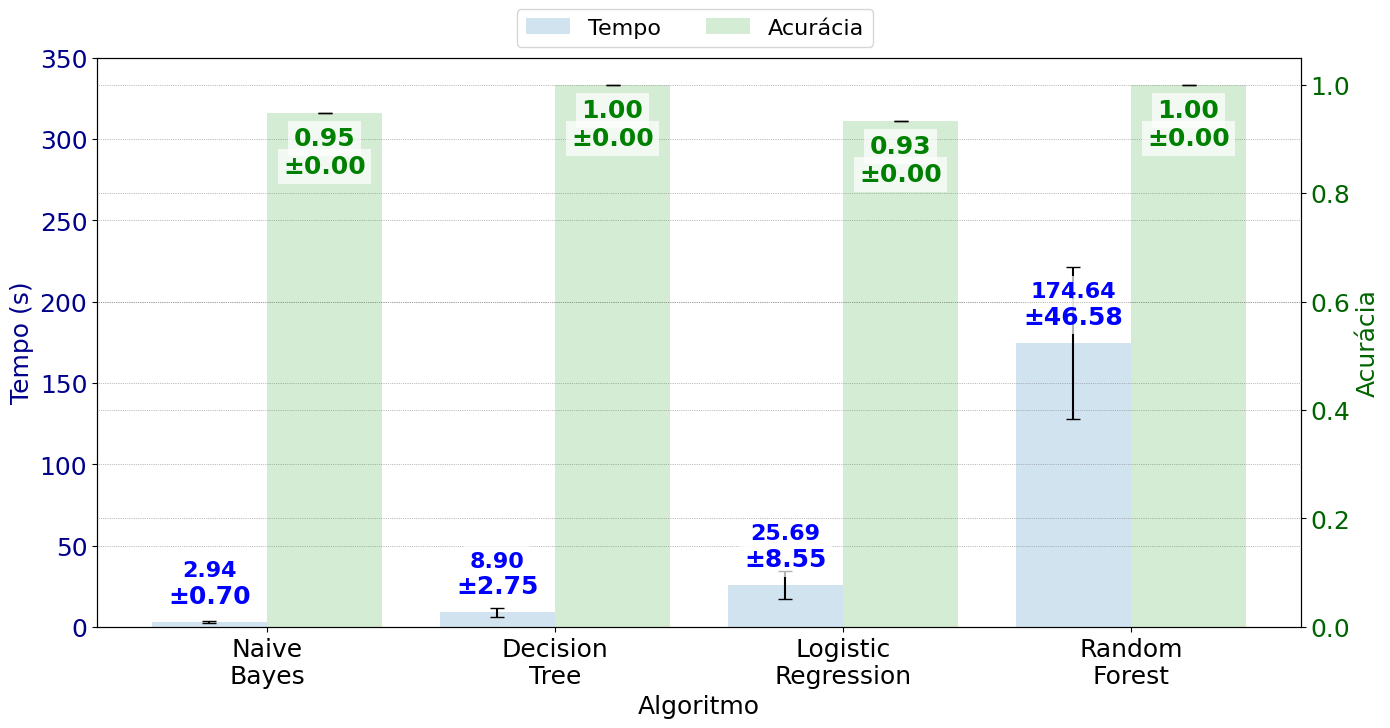

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)

media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values
})

data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente ML
for i in range(len(media_acuracia_ml)):
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente ML
bar1_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente ML
for i in range(len(media_tempo_ml)):
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_ml.annotate(f'±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=18)
ax1_ml.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_ml.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_ml.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente ML
ax1_ml.set_ylim(0, 350)

# Adicionar a legenda para o ambiente ML
fig_ml.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_ml.png", bbox_inches='tight')
plt.show()

<ipython-input-9-1e2d68b9cb7f>:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
<ipython-input-9-1e2d68b9cb7f>:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width/2, media_acuracia_bd[i]),
<ipython-input-9-1e2d68b9cb7f>:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-9-1e2d68b9cb7f>:77: Futur

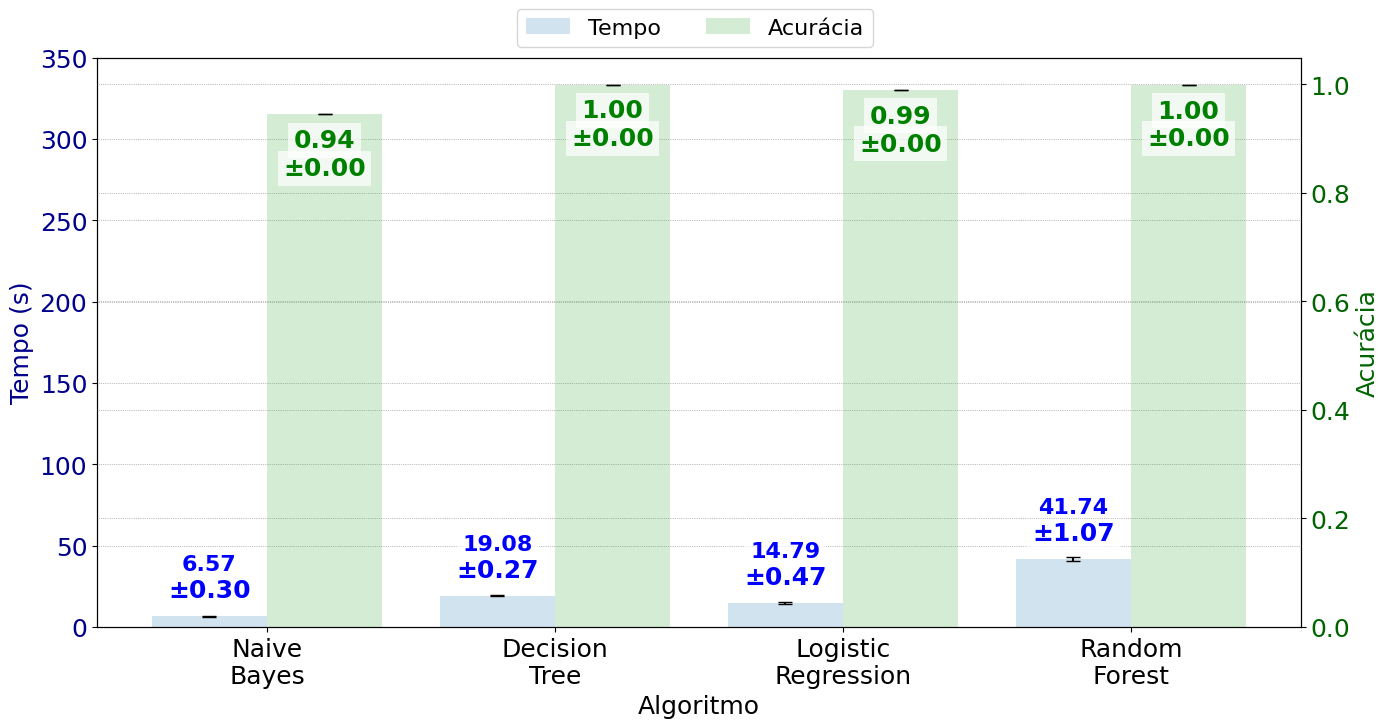

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
# arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultados_abd_maquina_fisica.csv'
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente BD
for i in range(len(media_acuracia_bd)):
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_bd[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente BD
bar1_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente BD
for i in range(len(media_tempo_bd)):
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica.png", bbox_inches='tight')
plt.show()

<ipython-input-10-aa2b42f97fcc>:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
<ipython-input-10-aa2b42f97fcc>:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width, media_acuracia_bd[i]),
<ipython-input-10-aa2b42f97fcc>:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-10-aa2b42f97fcc>:92: Fut

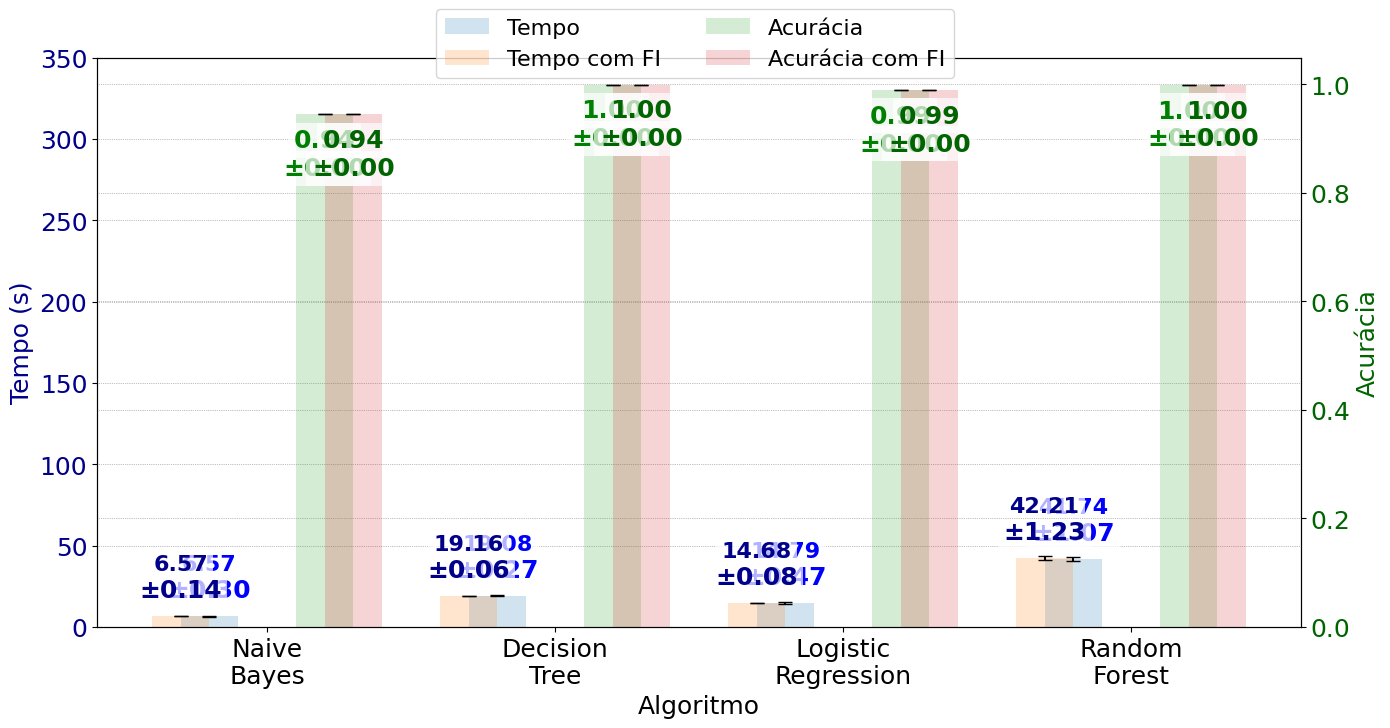

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Anotar média e intervalo de confiança para acurácia e acurácia com FI do ambiente BD
for i in range(len(media_acuracia_bd)):
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width, media_acuracia_bd[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width, media_acuracia_bd[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='darkgreen', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_bd.annotate(f'±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='darkgreen', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotar média e intervalo de confiança para tempo e tempo com FI do ambiente BD
for i in range(len(media_tempo_bd)):
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}',
                    xy=(i - bar_width, media_tempo_bd[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - bar_width, media_tempo_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'{media_tempo_com_feature[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_com_feature[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='darkblue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_bd.annotate(f'±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='darkblue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()

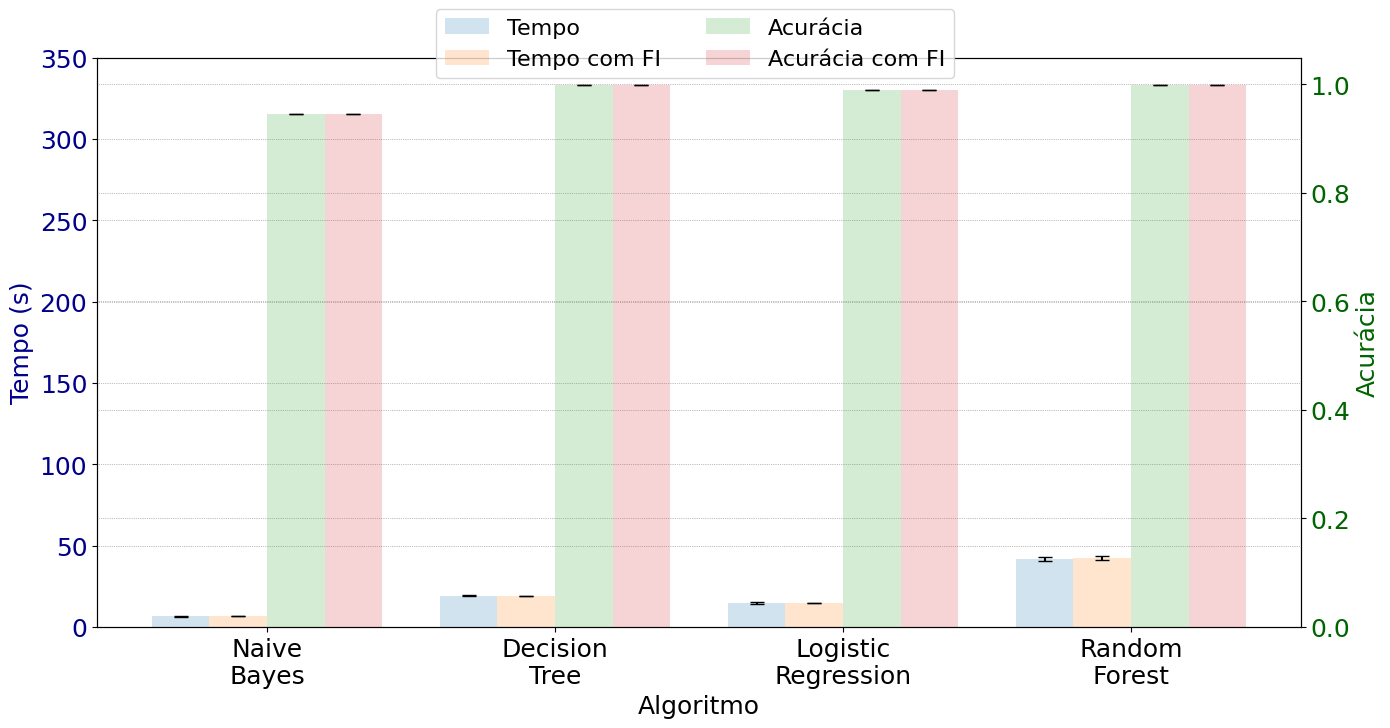

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()


<ipython-input-14-8cc20d253834>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-14-8cc20d253834>:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width / 2, media_acuracia_bd[i]),
<ipython-input-14-8cc20d253834>:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\

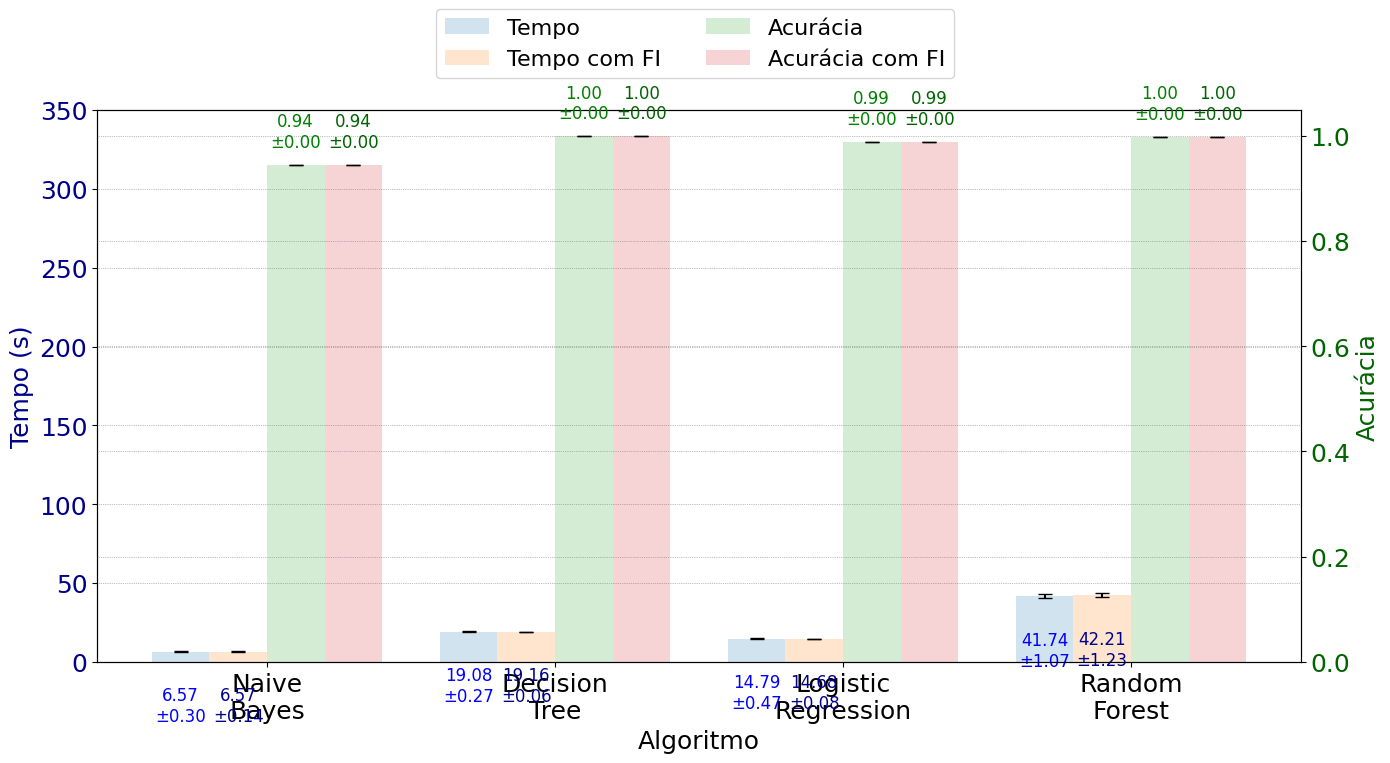

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotações para intervalos de confiança e valores médios
for i in range(len(media_acuracia_bd)):
    # Acurácia
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width / 2, media_acuracia_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='green')

    # Acurácia com FI
    ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\n±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='darkgreen')

    # Tempo
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}\n±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_bd[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='blue')

    # Tempo com FI
    ax1_bd.annotate(f'{media_tempo_com_feature[i]:.2f}\n±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - bar_width / 2, media_tempo_com_feature[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='darkblue')

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.1), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()


<ipython-input-15-c39a6d948e6d>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-15-c39a6d948e6d>:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width / 2, media_acuracia_bd[i]),
<ipython-input-15-c39a6d948e6d>:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\

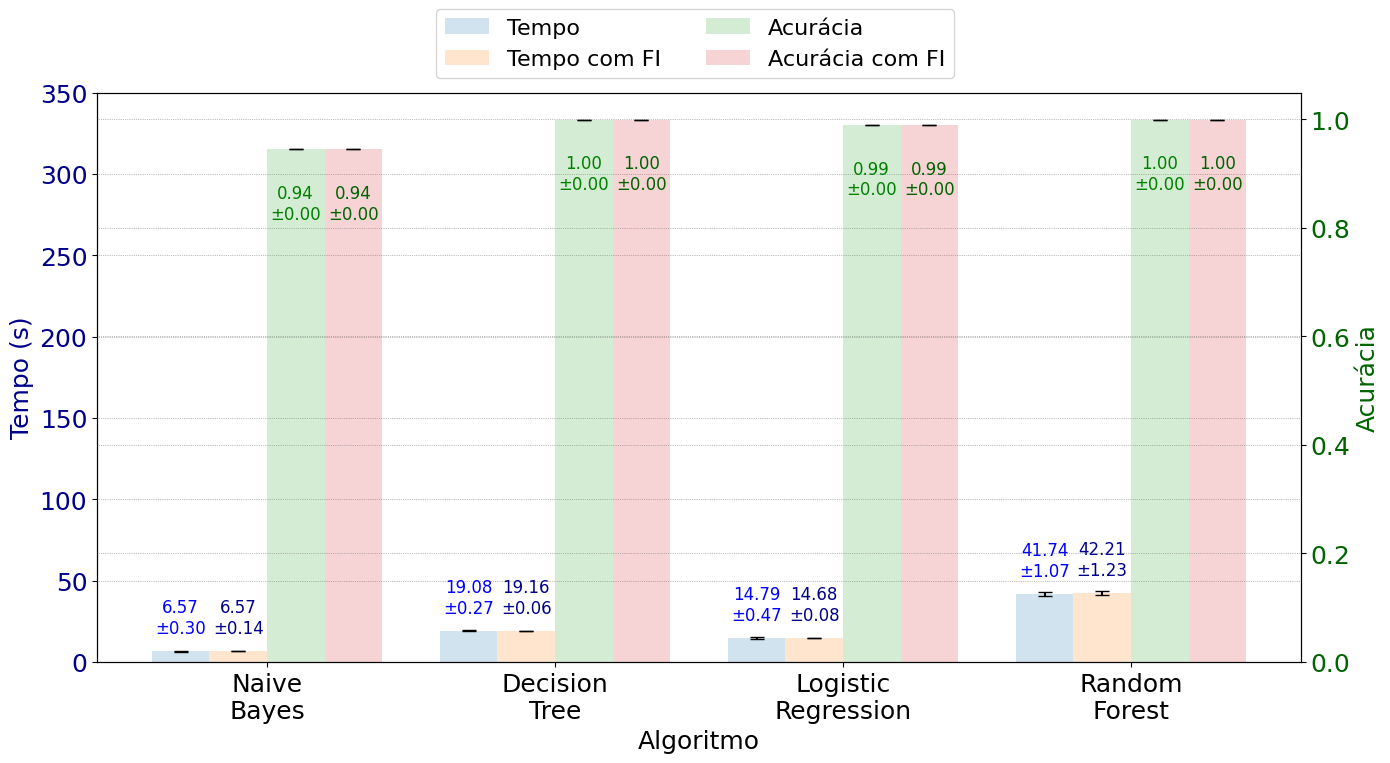

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotações para intervalos de confiança e valores médios
for i in range(len(media_acuracia_bd)):
    # Acurácia (agora abaixo)
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width / 2, media_acuracia_bd[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='green')

    # Acurácia com FI (agora abaixo)
    ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\n±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='darkgreen')

    # Tempo (agora acima)
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}\n±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='blue')

    # Tempo com FI (agora acima)
    ax1_bd.annotate(f'{media_tempo_com_feature[i]:.2f}\n±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - bar_width / 2, media_tempo_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='darkblue')

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.1), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()


<ipython-input-16-b6a2af6ed0d0>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-16-b6a2af6ed0d0>:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width / 2, media_acuracia_bd[i]),
<ipython-input-16-b6a2af6ed0d0>:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\

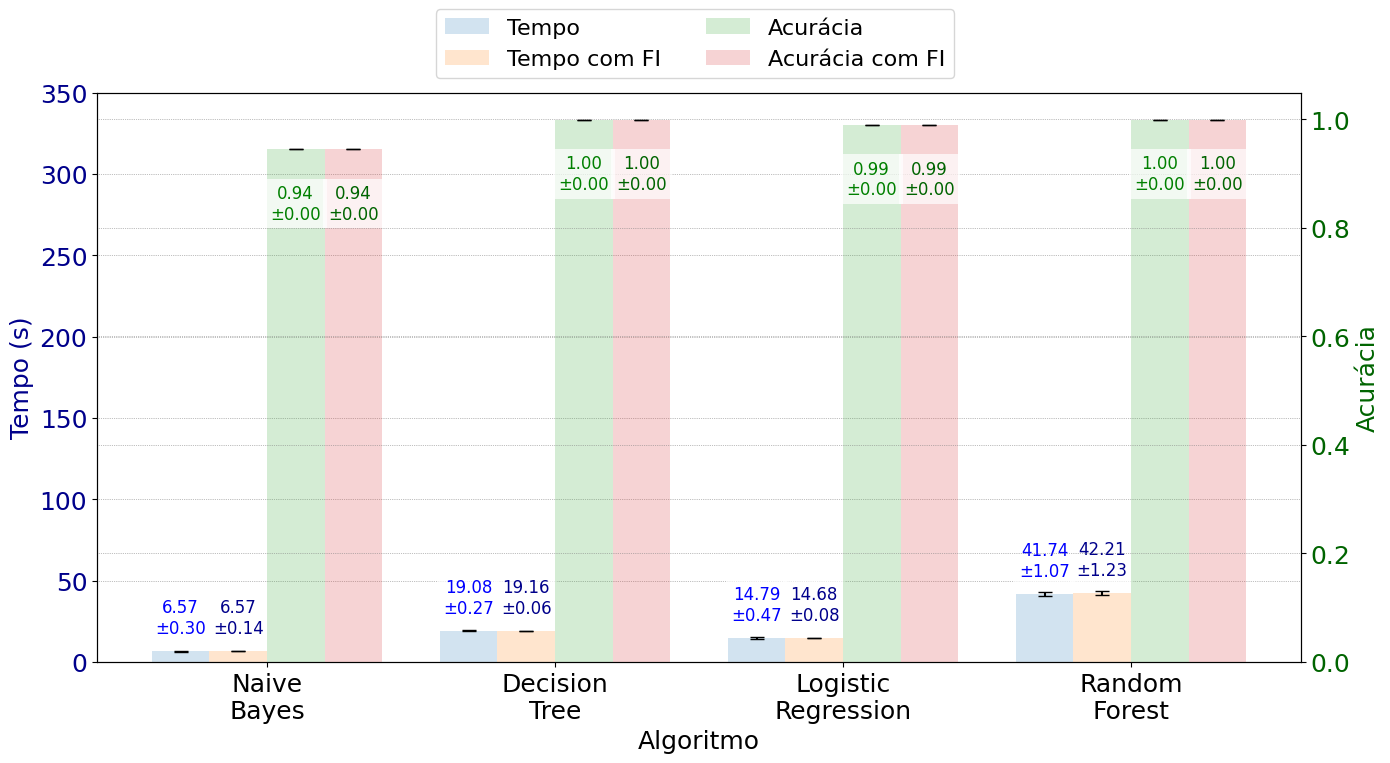

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotações para intervalos de confiança e valores médios com sombra
for i in range(len(media_acuracia_bd)):
    # Acurácia (abaixo com sombreamento)
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width / 2, media_acuracia_bd[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='green',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Acurácia com FI (abaixo com sombreamento)
    ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\n±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='darkgreen',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo (acima com sombreamento)
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}\n±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='blue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo com FI (acima com sombreamento)
    ax1_bd.annotate(f'{media_tempo_com_feature[i]:.2f}\n±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - bar_width / 2, media_tempo_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='darkblue',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.1), ncol=2)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()


<ipython-input-27-c6ae36615d9f>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
<ipython-input-27-c6ae36615d9f>:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width / 2, media_acuracia_bd[i]),
<ipython-input-27-c6ae36615d9f>:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\

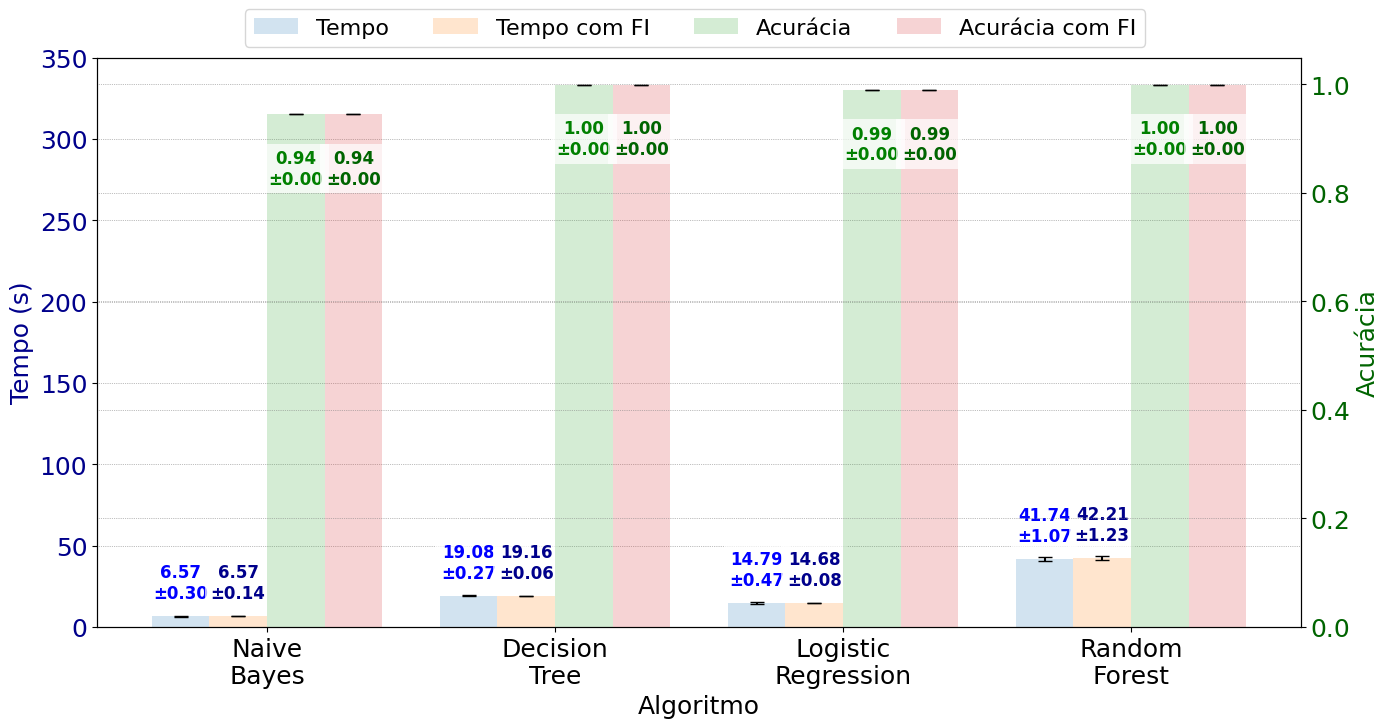

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_abd.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais
media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente BD
fig_bd, ax1_bd = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_bd))

# Configurar o eixo secundário para a acurácia
ax2_bd = ax1_bd.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente BD
bar2_bd = ax2_bd.bar([i + bar_width/2 for i in indices], media_acuracia_bd, bar_width, yerr=intervalo_confianca_acuracia_bd, capsize=5, label='Acurácia', color=paleta[2])
bar4_bd = ax2_bd.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente BD
bar1_bd = ax1_bd.bar([i - 1.5 * bar_width for i in indices], media_tempo_bd, bar_width, yerr=intervalo_confianca_tempo_bd, capsize=5, label='Tempo', color=paleta[0])
bar3_bd = ax1_bd.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotações para intervalos de confiança e valores médios com sombra e negrito
for i in range(len(media_acuracia_bd)):
    # Acurácia (abaixo com sombreamento e negrito)
    ax2_bd.annotate(f'{media_acuracia_bd[i]:.2f}\n±{intervalo_confianca_acuracia_bd[i]:.2f}',
                    xy=(i + bar_width / 2, media_acuracia_bd[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Acurácia com FI (abaixo com sombreamento e negrito)
    ax2_bd.annotate(f'{media_acuracia_com_feature[i]:.2f}\n±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='darkgreen', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo (acima com sombreamento e negrito)
    ax1_bd.annotate(f'{media_tempo_bd[i]:.2f}\n±{intervalo_confianca_tempo_bd[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_bd[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo com FI (acima com sombreamento e negrito)
    ax1_bd.annotate(f'{media_tempo_com_feature[i]:.2f}\n±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - bar_width / 2, media_tempo_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='darkblue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente BD
ax1_bd.set_xlabel('Algoritmo', fontsize=18)
ax1_bd.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_bd.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_bd.set_xticks(indices)
ax1_bd.set_xticklabels(data_combined_bd['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_bd.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_bd.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_bd.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente BD
ax1_bd.set_ylim(0, 350)

# Adicionar a legenda para o ambiente BD
# fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.1), ncol=2)

# Adicionar a legenda para o ambiente BD com todas as legendas na mesma linha e menor espaçamento
fig_bd.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=4)

# Adicionar o grid para o ambiente BD
ax1_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_bd.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente BD
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_abd_maquina_fisica_com_fi.png", bbox_inches='tight')
plt.show()

<ipython-input-25-3959632a0463>:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}\n±{intervalo_confianca_acuracia_ml[i]:.2f}',
<ipython-input-25-3959632a0463>:90: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width / 2, media_acuracia_ml[i]),
<ipython-input-25-3959632a0463>:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_ml.annotate(f'{media_acuracia_com_feature[i]:.2f}\

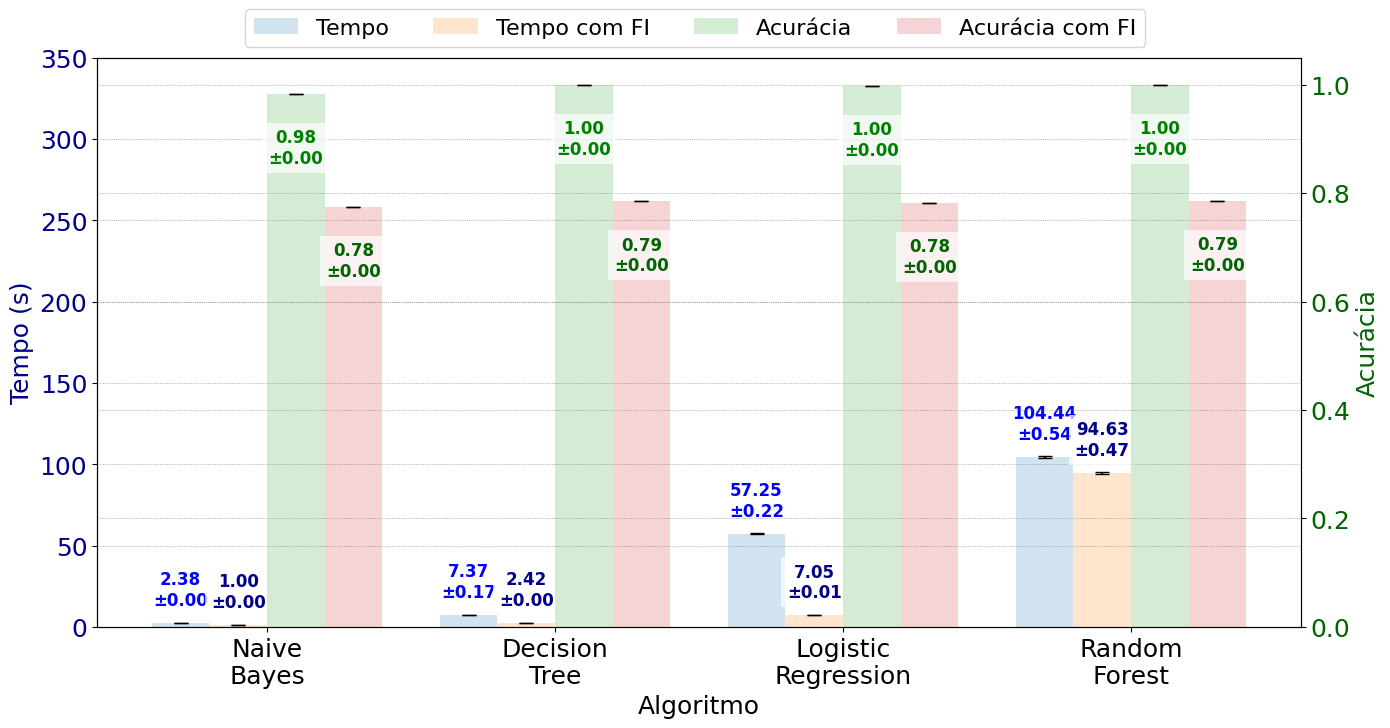

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/resultado_defesa_final/resultado_apg.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números das colunas e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['tempo_com_feature_importance'] = resultados['tempo_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)
resultados['acuracia_com_feature_importance'] = resultados['acuracia_com_feature_importance'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular médias e intervalos de confiança para as novas colunas, assim como as colunas originais para o ambiente "ml"
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_com_feature = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['tempo_com_feature_importance'].mean()
intervalo_confianca_tempo_com_feature = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['tempo_com_feature_importance'].std()

media_acuracia_com_feature = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['acuracia_com_feature_importance'].mean()
intervalo_confianca_acuracia_com_feature = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['acuracia_com_feature_importance'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)
media_tempo_com_feature = media_tempo_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_tempo_com_feature = intervalo_confianca_tempo_com_feature.reindex(ordem_algoritmos)
media_acuracia_com_feature = media_acuracia_com_feature.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_com_feature = intervalo_confianca_acuracia_com_feature.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values,
    'Tempo com FI': media_tempo_com_feature.values,
    'Intervalo_Tempo_FI': intervalo_confianca_tempo_com_feature.values,
    'Acurácia com FI': media_acuracia_com_feature.values,
    'Intervalo_Acurácia_FI': intervalo_confianca_acuracia_com_feature.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.2

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia e acurácia com FI do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])
bar4_ml = ax2_ml.bar([i + 1.5 * bar_width for i in indices], media_acuracia_com_feature, bar_width, yerr=intervalo_confianca_acuracia_com_feature, capsize=5, label='Acurácia com FI', color=paleta[3])

# Gráfico de barras para o tempo e tempo com FI do ambiente ML
bar1_ml = ax1_ml.bar([i - 1.5 * bar_width for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])
bar3_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_com_feature, bar_width, yerr=intervalo_confianca_tempo_com_feature, capsize=5, label='Tempo com FI', color=paleta[1])

# Anotações para intervalos de confiança e valores médios com sombra e negrito
for i in range(len(media_acuracia_ml)):
    # Acurácia (abaixo com sombreamento e negrito)
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}\n±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width / 2, media_acuracia_ml[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Acurácia com FI (abaixo com sombreamento e negrito)
    ax2_ml.annotate(f'{media_acuracia_com_feature[i]:.2f}\n±{intervalo_confianca_acuracia_com_feature[i]:.2f}',
                    xy=(i + 1.5 * bar_width, media_acuracia_com_feature[i]),
                    xytext=(0, -25),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=12, color='darkgreen', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo (acima com sombreamento e negrito)
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}\n±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - 1.5 * bar_width, media_tempo_ml[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Tempo com FI (acima com sombreamento e negrito)
    ax1_ml.annotate(f'{media_tempo_com_feature[i]:.2f}\n±{intervalo_confianca_tempo_com_feature[i]:.2f}',
                    xy=(i - bar_width / 2, media_tempo_com_feature[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=12, color='darkblue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=18)
ax1_ml.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_ml.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_ml.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente ML
ax1_ml.set_ylim(0, 350)

# Adicionar a legenda para o ambiente ML
# fig_ml.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.1), ncol=2)

# Adicionar a legenda para o ambiente ML com todas as legendas na mesma linha e menor espaçamento
fig_ml.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=4)

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_apg_maquina_fisica_com_fi_ml.png", bbox_inches='tight')
plt.show()

<ipython-input-1-6c69ec92354d>:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
<ipython-input-1-6c69ec92354d>:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(i + bar_width/2, media_acuracia_ml[i]),
<ipython-input-1-6c69ec92354d>:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
<ipython-input-1-6c69ec92354d>:95: Futur

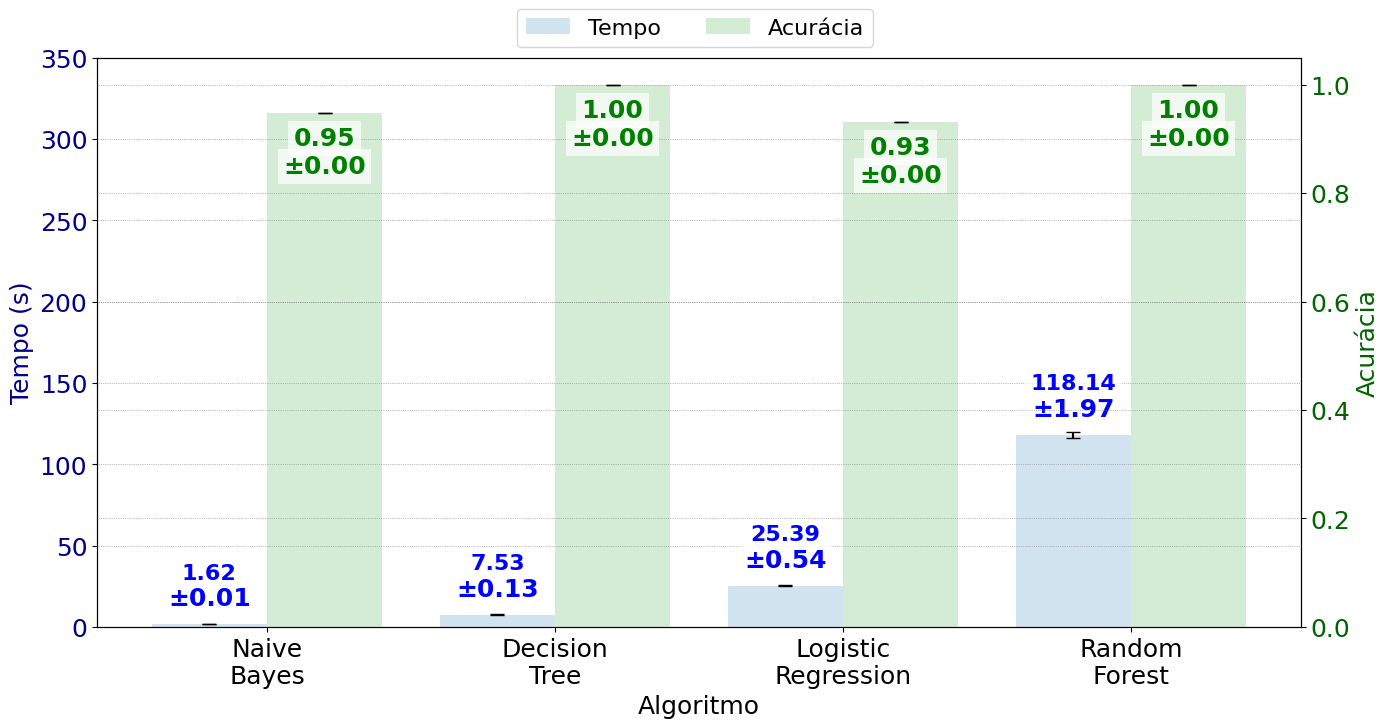

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = '/content/drive/MyDrive/Mestrado/dataset/attack-ddos-layer7/resultado_apg_maquina_fisica.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança por ambiente
media_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_ml = resultados[resultados['ambiente'] == 'ml'].groupby('algoritmo')['iteracoes_acuracia'].std()

media_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia_bd = resultados[resultados['ambiente'] == 'bd'].groupby('algoritmo')['iteracoes_acuracia'].std()

# Mapeamento dos nomes dos algoritmos com quebra de linha
nome_algoritmos = {
    'nb': 'Naive\nBayes',
    'dt': 'Decision\nTree',
    'lr': 'Logistic\nRegression',
    'rf': 'Random\nForest'
}

# Reordenar as séries de acordo com a sequência desejada
ordem_algoritmos = ['nb', 'dt', 'lr', 'rf']
media_tempo_ml = media_tempo_ml.reindex(ordem_algoritmos)
intervalo_confianca_tempo_ml = intervalo_confianca_tempo_ml.reindex(ordem_algoritmos)
media_acuracia_ml = media_acuracia_ml.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_ml = intervalo_confianca_acuracia_ml.reindex(ordem_algoritmos)

media_tempo_bd = media_tempo_bd.reindex(ordem_algoritmos)
intervalo_confianca_tempo_bd = intervalo_confianca_tempo_bd.reindex(ordem_algoritmos)
media_acuracia_bd = media_acuracia_bd.reindex(ordem_algoritmos)
intervalo_confianca_acuracia_bd = intervalo_confianca_acuracia_bd.reindex(ordem_algoritmos)

# Criar um DataFrame para os dados combinados
data_combined_ml = pd.DataFrame({
    'Algoritmo': media_tempo_ml.index.map(nome_algoritmos),
    'Tempo': media_tempo_ml.values,
    'Acurácia': media_acuracia_ml.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_ml.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_ml.values
})

data_combined_bd = pd.DataFrame({
    'Algoritmo': media_tempo_bd.index.map(nome_algoritmos),
    'Tempo': media_tempo_bd.values,
    'Acurácia': media_acuracia_bd.values,
    'Intervalo_Tempo': intervalo_confianca_tempo_bd.values,
    'Intervalo_Acurácia': intervalo_confianca_acuracia_bd.values
})

# Definir a paleta de cores com transparência
paleta = sns.color_palette("tab10")
paleta = [(r, g, b, 0.2) for r, g, b in paleta]

# Configurar o gráfico para o ambiente ML
fig_ml, ax1_ml = plt.subplots(figsize=(14, 7))

# Largura das barras
bar_width = 0.4

# Posições das barras
indices = range(len(media_tempo_ml))

# Configurar o eixo secundário para a acurácia
ax2_ml = ax1_ml.twinx()

# Gráfico de barras para a acurácia do ambiente ML
bar2_ml = ax2_ml.bar([i + bar_width/2 for i in indices], media_acuracia_ml, bar_width, yerr=intervalo_confianca_acuracia_ml, capsize=5, label='Acurácia', color=paleta[2])

# Anotar média e intervalo de confiança para acurácia do ambiente ML
for i in range(len(media_acuracia_ml)):
    ax2_ml.annotate(f'{media_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -10),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2_ml.annotate(f'±{intervalo_confianca_acuracia_ml[i]:.2f}',
                    xy=(i + bar_width/2, media_acuracia_ml[i]),
                    xytext=(0, -30),
                    textcoords='offset points',
                    ha='center', va='top',
                    fontsize=18, color='green', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Gráfico de barras para o tempo do ambiente ML
bar1_ml = ax1_ml.bar([i - bar_width/2 for i in indices], media_tempo_ml, bar_width, yerr=intervalo_confianca_tempo_ml, capsize=5, label='Tempo', color=paleta[0])

# Anotar média e intervalo de confiança para tempo do ambiente ML
for i in range(len(media_tempo_ml)):
    ax1_ml.annotate(f'{media_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 30),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=16, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax1_ml.annotate(f'±{intervalo_confianca_tempo_ml[i]:.2f}',
                    xy=(i - bar_width/2, media_tempo_ml[i]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=18, color='blue', fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Configurar os eixos e legendas para o ambiente ML
ax1_ml.set_xlabel('Algoritmo', fontsize=18)
ax1_ml.set_ylabel('Tempo (s)', fontsize=18, color='darkblue')
ax2_ml.set_ylabel('Acurácia', fontsize=18, color='darkgreen')
ax1_ml.set_xticks(indices)
ax1_ml.set_xticklabels(data_combined_ml['Algoritmo'], rotation=0, ha='center', fontsize=14)  # Centralizando os rótulos
ax1_ml.tick_params(axis='y', labelcolor='darkblue', labelsize=18)
ax2_ml.tick_params(axis='y', labelcolor='darkgreen', labelsize=18)
ax1_ml.tick_params(axis='x', labelsize=18)

# Ajustar o limite do eixo y para o ambiente ML
ax1_ml.set_ylim(0, 350)

# Adicionar a legenda para o ambiente ML
fig_ml.legend(loc='upper center', fontsize=16, bbox_to_anchor=(0.5, 1.05), ncol=2)

# Adicionar o grid para o ambiente ML
ax1_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')
ax2_ml.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray')

# Ajustar a aparência geral dos gráficos para o ambiente ML
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo_ml.png", bbox_inches='tight')
plt.show()